In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(caret)
library(ResourceSelection)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.3.3"
Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice

Warning message:
"package 'ResourceSelection' was built under R version 4.3.3"
ResourceSelection 0.3-6 	 2023-06-27



In [2]:
fraud_data <- read.csv("fraud.csv")
head(fraud_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-0.6980436,-0.04419812,1.6811673,0.9745233,-0.245692619,0.34715606,0.19516625,0.08370937,0.3320762,⋯,-0.02528877,0.38346201,-0.17712600,0.1105104,0.2466123,-0.3923114,0.33748690,-0.06418093,149.62,0
2,0,0.6118281,0.16162642,0.1103481,0.3168994,0.043585540,-0.06183566,-0.06418938,0.07217789,-0.2331601,⋯,-0.31188331,-0.88147339,0.16239800,-0.5611484,0.3207289,0.2611633,-0.02269927,0.04488712,2.69,0
3,1,-0.6972977,-0.81384628,1.1753368,0.2685503,-0.365428546,1.35179670,0.64468863,0.21006306,-1.3826241,⋯,0.34258177,1.06504576,1.45808689,-1.1381284,-0.6286053,-0.2885504,-0.13987025,-0.18215547,378.66,0
4,1,-0.4960260,-0.11248295,1.1884502,-0.6104519,-0.007486433,0.93638751,0.19354560,0.32011743,-1.2661192,⋯,-0.14960499,0.00727844,-0.30514637,-1.9410890,1.2420391,-0.4603827,0.15849354,0.18735562,123.50,0
5,2,-0.5945675,0.53302677,1.0265370,0.2849940,-0.295708736,0.07201686,0.48298296,-0.22944885,0.7464582,⋯,-0.01302746,1.10175693,-0.22039050,0.2332575,-0.3952447,1.0419856,0.55445514,0.65590152,69.99,0
6,2,-0.2186654,0.58330073,0.7563618,-0.1189747,0.305725744,-0.02231914,0.38789196,0.22078229,-0.5191011,⋯,-0.28767899,-0.77265121,-0.04232414,-0.6132929,-0.4466323,0.2197161,0.64143563,0.24717586,3.67,0


In [3]:
dim(fraud_data)

[1] 283726     31

In [4]:
missing_values_per_column <- sum(colSums(is.na(fraud_data)))
cat("Number of missing values ", missing_values_per_column, "\n")

Number of missing values  0 


In [5]:
arbitrary_values_present <- any(fraud_data == ":" | fraud_data == "?" | fraud_data == "**")

if (arbitrary_values_present) {
  print("Arbitrary or undefined values were found in the data.")
} else {
  print("No arbitrary or undefined values were found in the data.")
}

[1] "No arbitrary or undefined values were found in the data."


In [6]:
variables <- names(fraud_data)

measurement_table <- data.frame(Variable = character(), Level_of_Measurement = character(), stringsAsFactors = FALSE)

for (variable in variables) {
  var_class <- class(fraud_data[[variable]])
  
  if (var_class %in% c("integer", "numeric")) {
    measurement <- "Interval or Ratio"
  } else if (var_class == "factor") {
    measurement <- "Nominal"
  } else if (var_class == "logical") {
    measurement <- "Nominal (Binary)"
  } else {
    measurement <- "Unknown"
  }
  
  measurement_table <- rbind(measurement_table, data.frame(Variable = variable, Level_of_Measurement = measurement))
}

print(measurement_table)

   Variable Level_of_Measurement
1      Time    Interval or Ratio
2        V1    Interval or Ratio
3        V2    Interval or Ratio
4        V3    Interval or Ratio
5        V4    Interval or Ratio
6        V5    Interval or Ratio
7        V6    Interval or Ratio
8        V7    Interval or Ratio
9        V8    Interval or Ratio
10       V9    Interval or Ratio
11      V10    Interval or Ratio
12      V11    Interval or Ratio
13      V12    Interval or Ratio
14      V13    Interval or Ratio
15      V14    Interval or Ratio
16      V15    Interval or Ratio
17      V16    Interval or Ratio
18      V17    Interval or Ratio
19      V18    Interval or Ratio
20      V19    Interval or Ratio
21      V20    Interval or Ratio
22      V21    Interval or Ratio
23      V22    Interval or Ratio
24      V23    Interval or Ratio
25      V24    Interval or Ratio
26      V25    Interval or Ratio
27      V26    Interval or Ratio
28      V27    Interval or Ratio
29      V28    Interval or Ratio
30   Amoun

In [7]:
str(fraud_data)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [8]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [9]:
fraud_data$Class <- as.factor(fraud_data$Class)

In [10]:
str(fraud_data)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [11]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [12]:
num_duplicates <- anyDuplicated(fraud_data)

In [13]:
print(num_duplicates)

[1] 0


In [14]:
t_test <- t.test(Time ~ Class, data = fraud_data)

print(t_test)

anova_result <- aov(Time ~ Class, data = fraud_data)

print(summary(anova_result))


	Welch Two Sample t-test

data:  Time by Class
t = 6.4272, df = 473.5, p-value = 3.175e-10
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  9986.762 18782.327
sample estimates:
mean in group 0 mean in group 1 
       94835.06        80450.51 

                Df    Sum Sq   Mean Sq F value   Pr(>F)    
Class            1 9.771e+10 9.771e+10   43.35 4.59e-11 ***
Residuals   283724 6.395e+14 2.254e+09                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## EDA

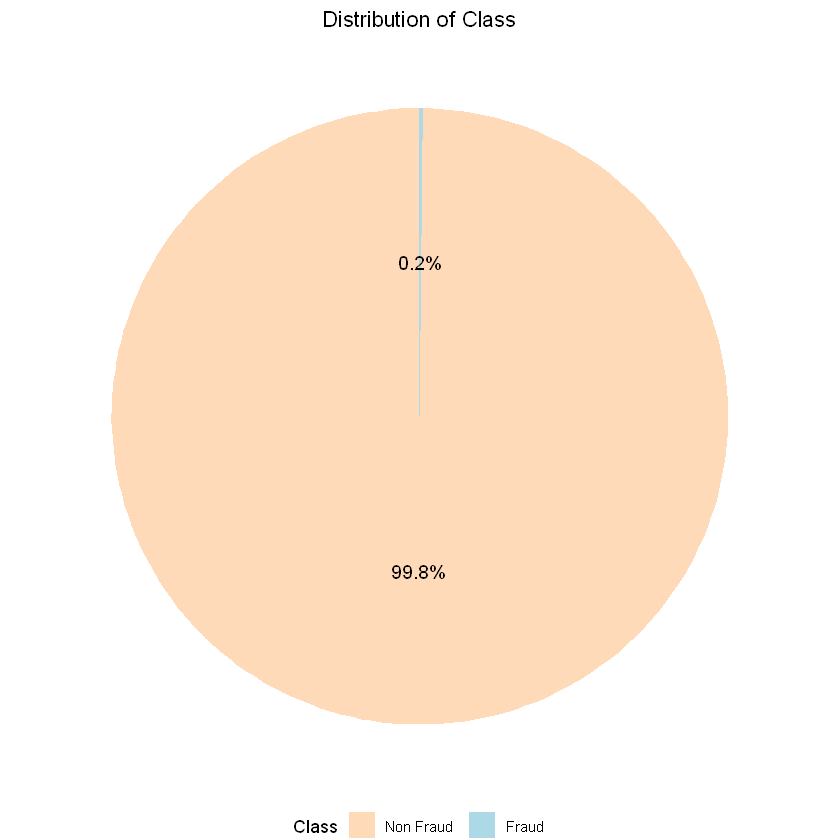

In [15]:
class_percentages <- prop.table(table(fraud_data$Class)) * 100

# Create a data frame for the pie chart
pie_data <- data.frame(Class = names(class_percentages), Percentage = as.vector(class_percentages))

# Create a pie chart with pastel colors
pie_chart <- ggplot(data = pie_data, aes(x = "", y = Percentage, fill = Class)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +  # Convert the bar plot to a pie chart
  labs(title = "Distribution of Class",
       fill = "Class",
       y = "Percentage") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 4) +  # Add percentage labels
  theme_void() +  # Remove axis and grid lines
  theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5)) +  # Position the legend at the bottom and center the title
  scale_fill_manual(labels = c("Non Fraud", "Fraud"), values = c("#FFDAB9", "#ADD8E6"))   # Set pastel colors

# Display the pie chart
print(pie_chart)

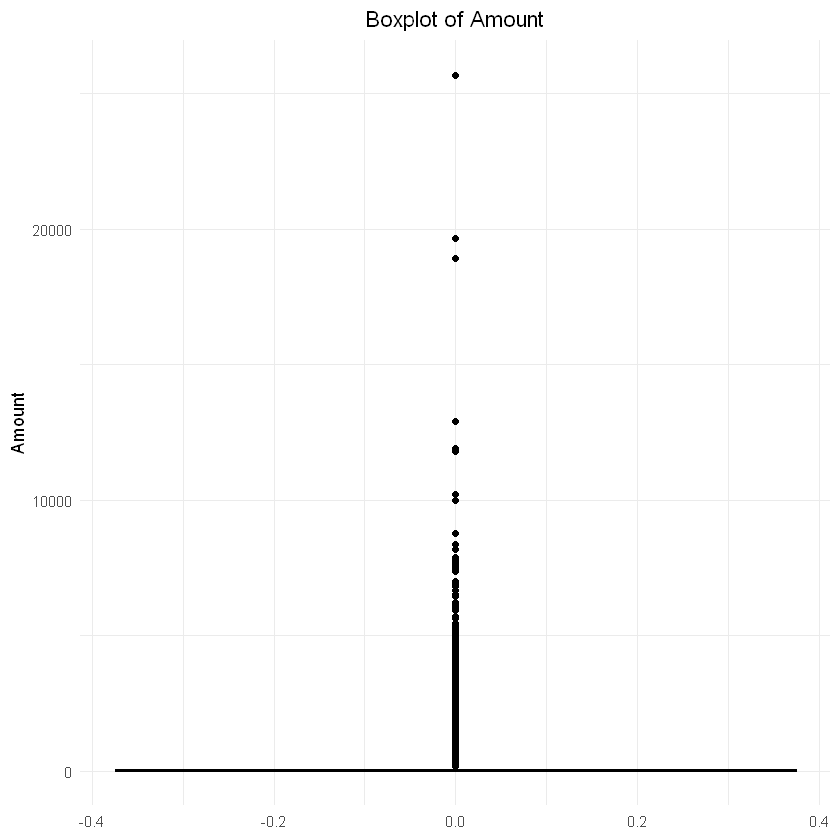

In [16]:
amount_boxplot <- ggplot(fraud_data, aes(y = Amount)) +
  geom_boxplot(fill = "#0072B2", color = "black") +
  labs(title = "Boxplot of Amount",
       y = "Amount") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the boxplot
print(amount_boxplot)

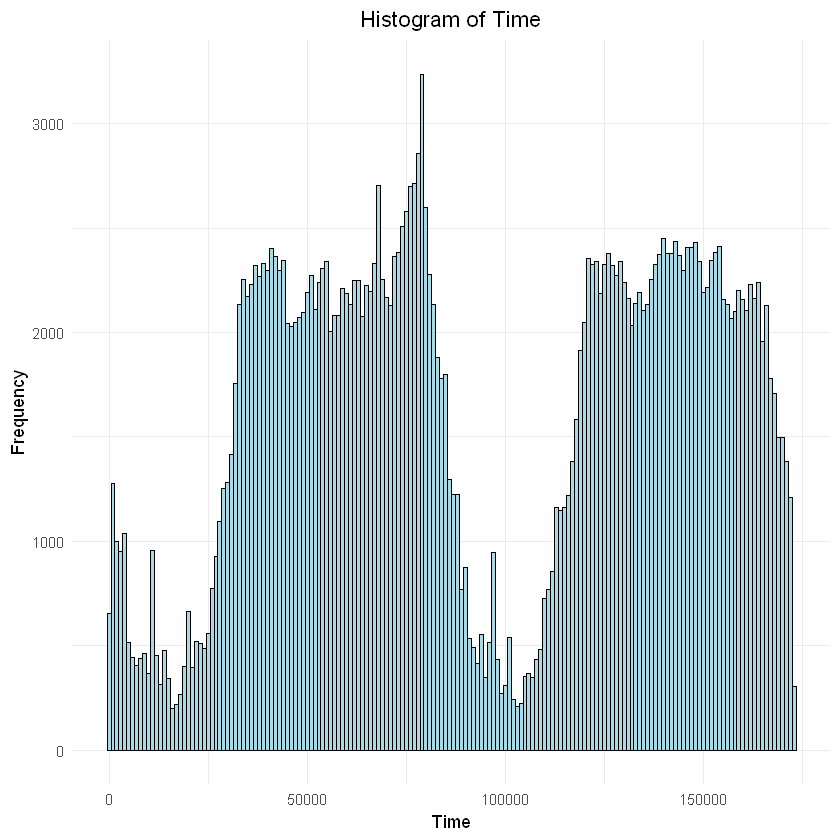

In [17]:
time_histogram <- ggplot(fraud_data, aes(x = Time)) +
  geom_histogram(binwidth = 1000, fill = "#ADD8E6", color = "black") +  # Adjust fill color here
  labs(title = "Histogram of Time",
       x = "Time",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the histogram
print(time_histogram)

In [18]:
numeric_data <- fraud_data[, !names(fraud_data) %in% "Class"]

# Create a correlation matrix
correlation_matrix <- cor(numeric_data)

# Print correlation matrix
print(correlation_matrix)

               Time            V1            V2            V3            V4
Time    1.000000000  0.1179266030 -0.0105555719 -4.220538e-01 -0.1058448928
V1      0.117926603  1.0000000000  0.0068749355 -8.111812e-03  0.0022573276
V2     -0.010555572  0.0068749355  1.0000000000  5.278252e-03 -0.0014952611
V3     -0.422053810 -0.0081118122  0.0052782517  1.000000e+00  0.0028287819
V4     -0.105844893  0.0022573276 -0.0014952611  2.828782e-03  1.0000000000
V5      0.173223011 -0.0070360158  0.0052098935 -6.878571e-03  0.0017442162
V6     -0.063279338  0.0004128357 -0.0005944499 -1.511482e-03 -0.0008804138
V7      0.085335181 -0.0091730804  0.0074247740 -1.172139e-02  0.0046569837
V8     -0.038203126 -0.0011682694  0.0028992257 -1.814670e-03  0.0008904924
V9     -0.007861473  0.0018280398 -0.0002739687 -3.578921e-03  0.0021543998
V10     0.031068100  0.0008152214  0.0006204527 -9.632286e-03  0.0027529558
V11    -0.248535957  0.0010280856 -0.0006332422  2.339002e-03 -0.0012228392
V12     0.12

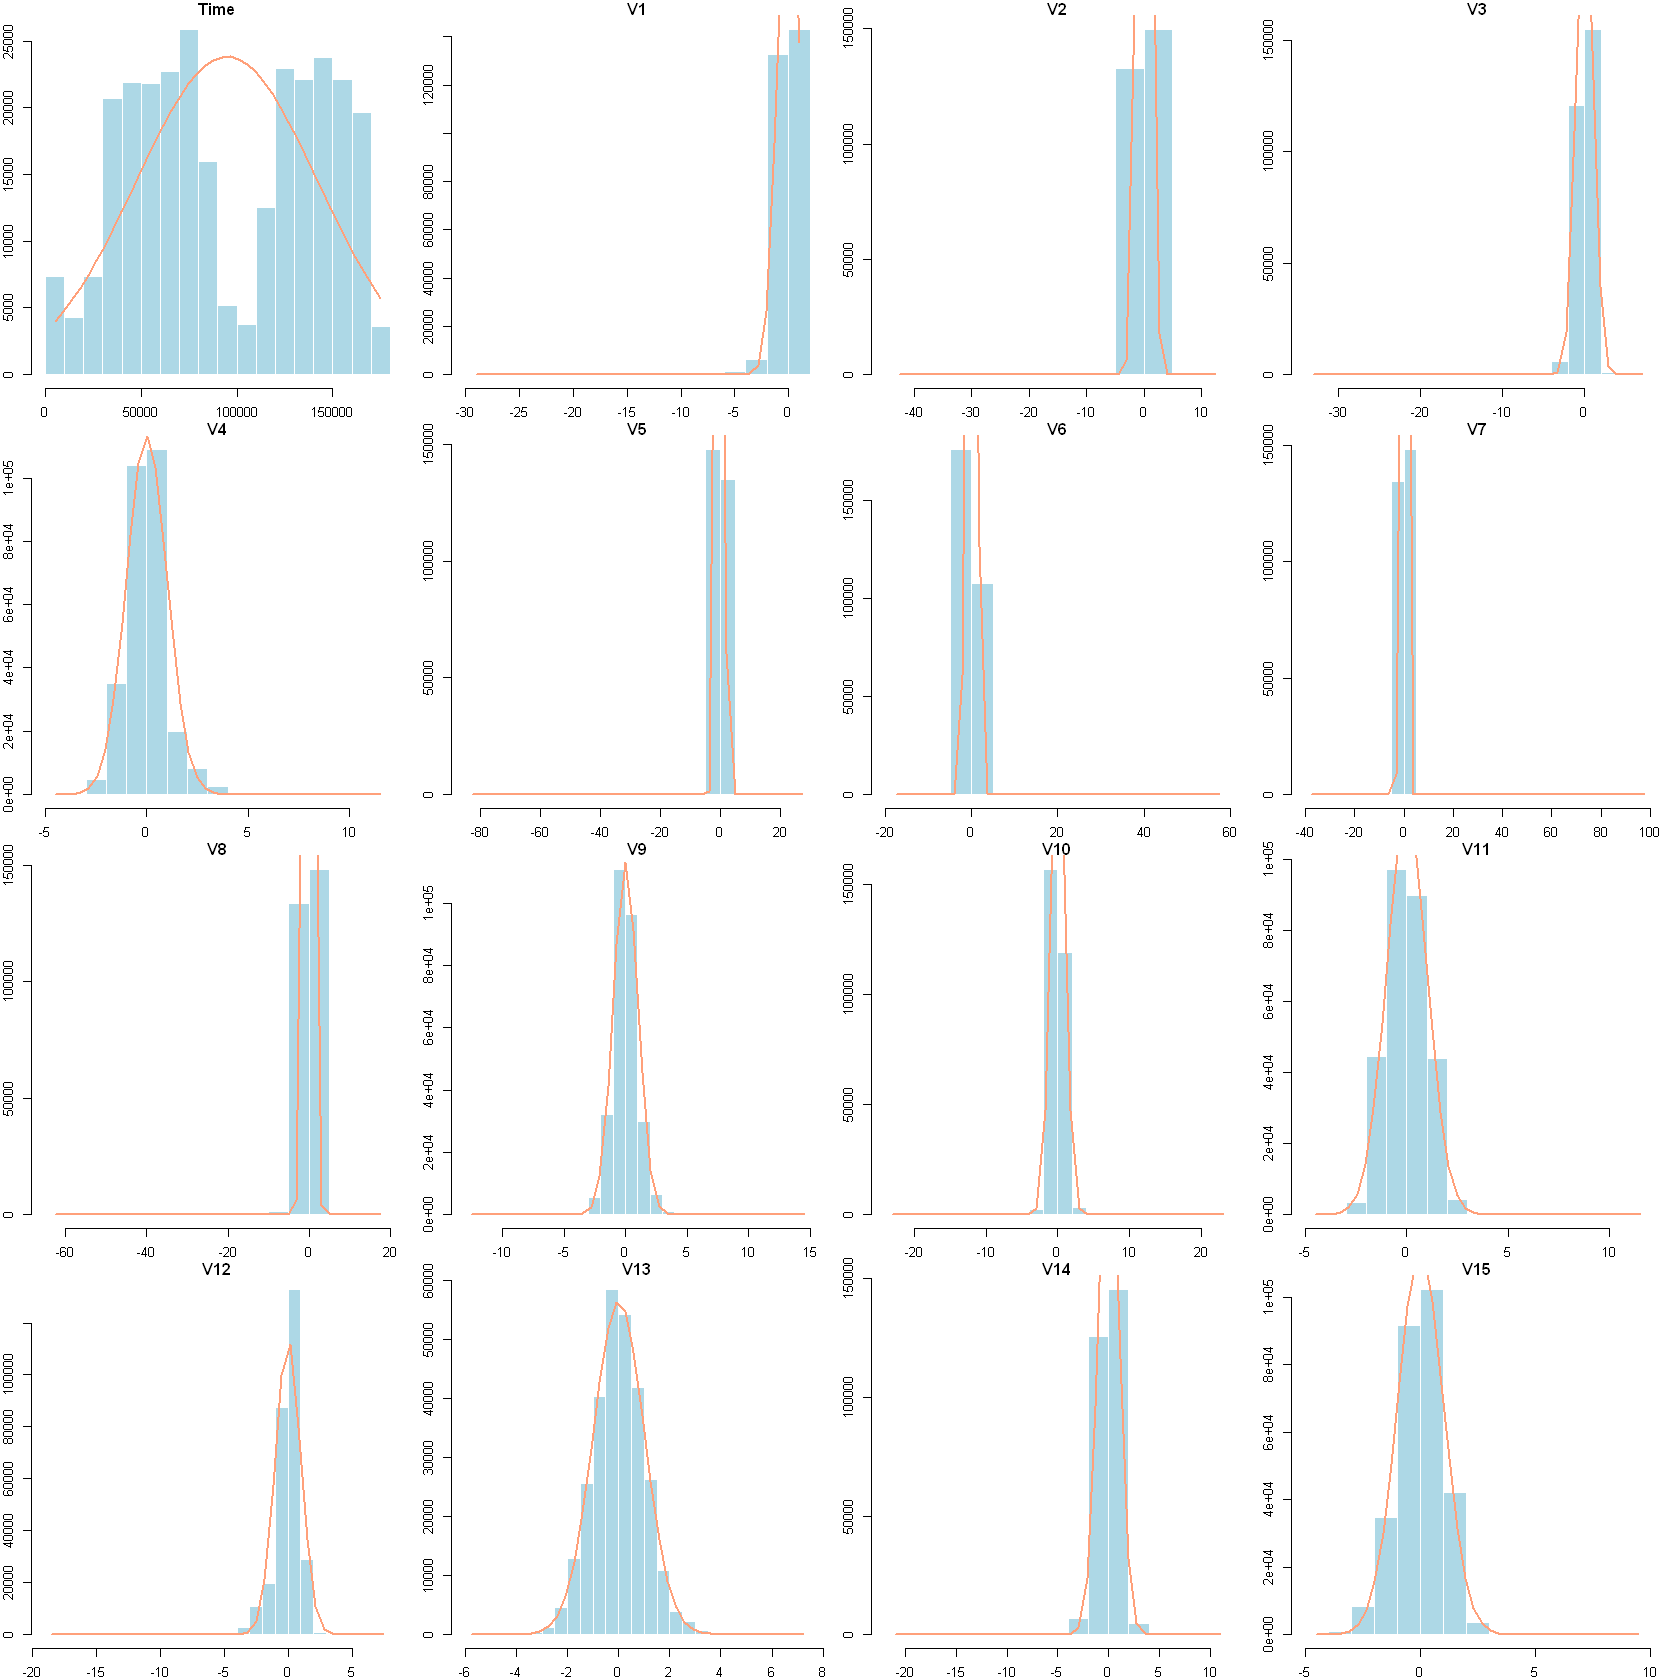

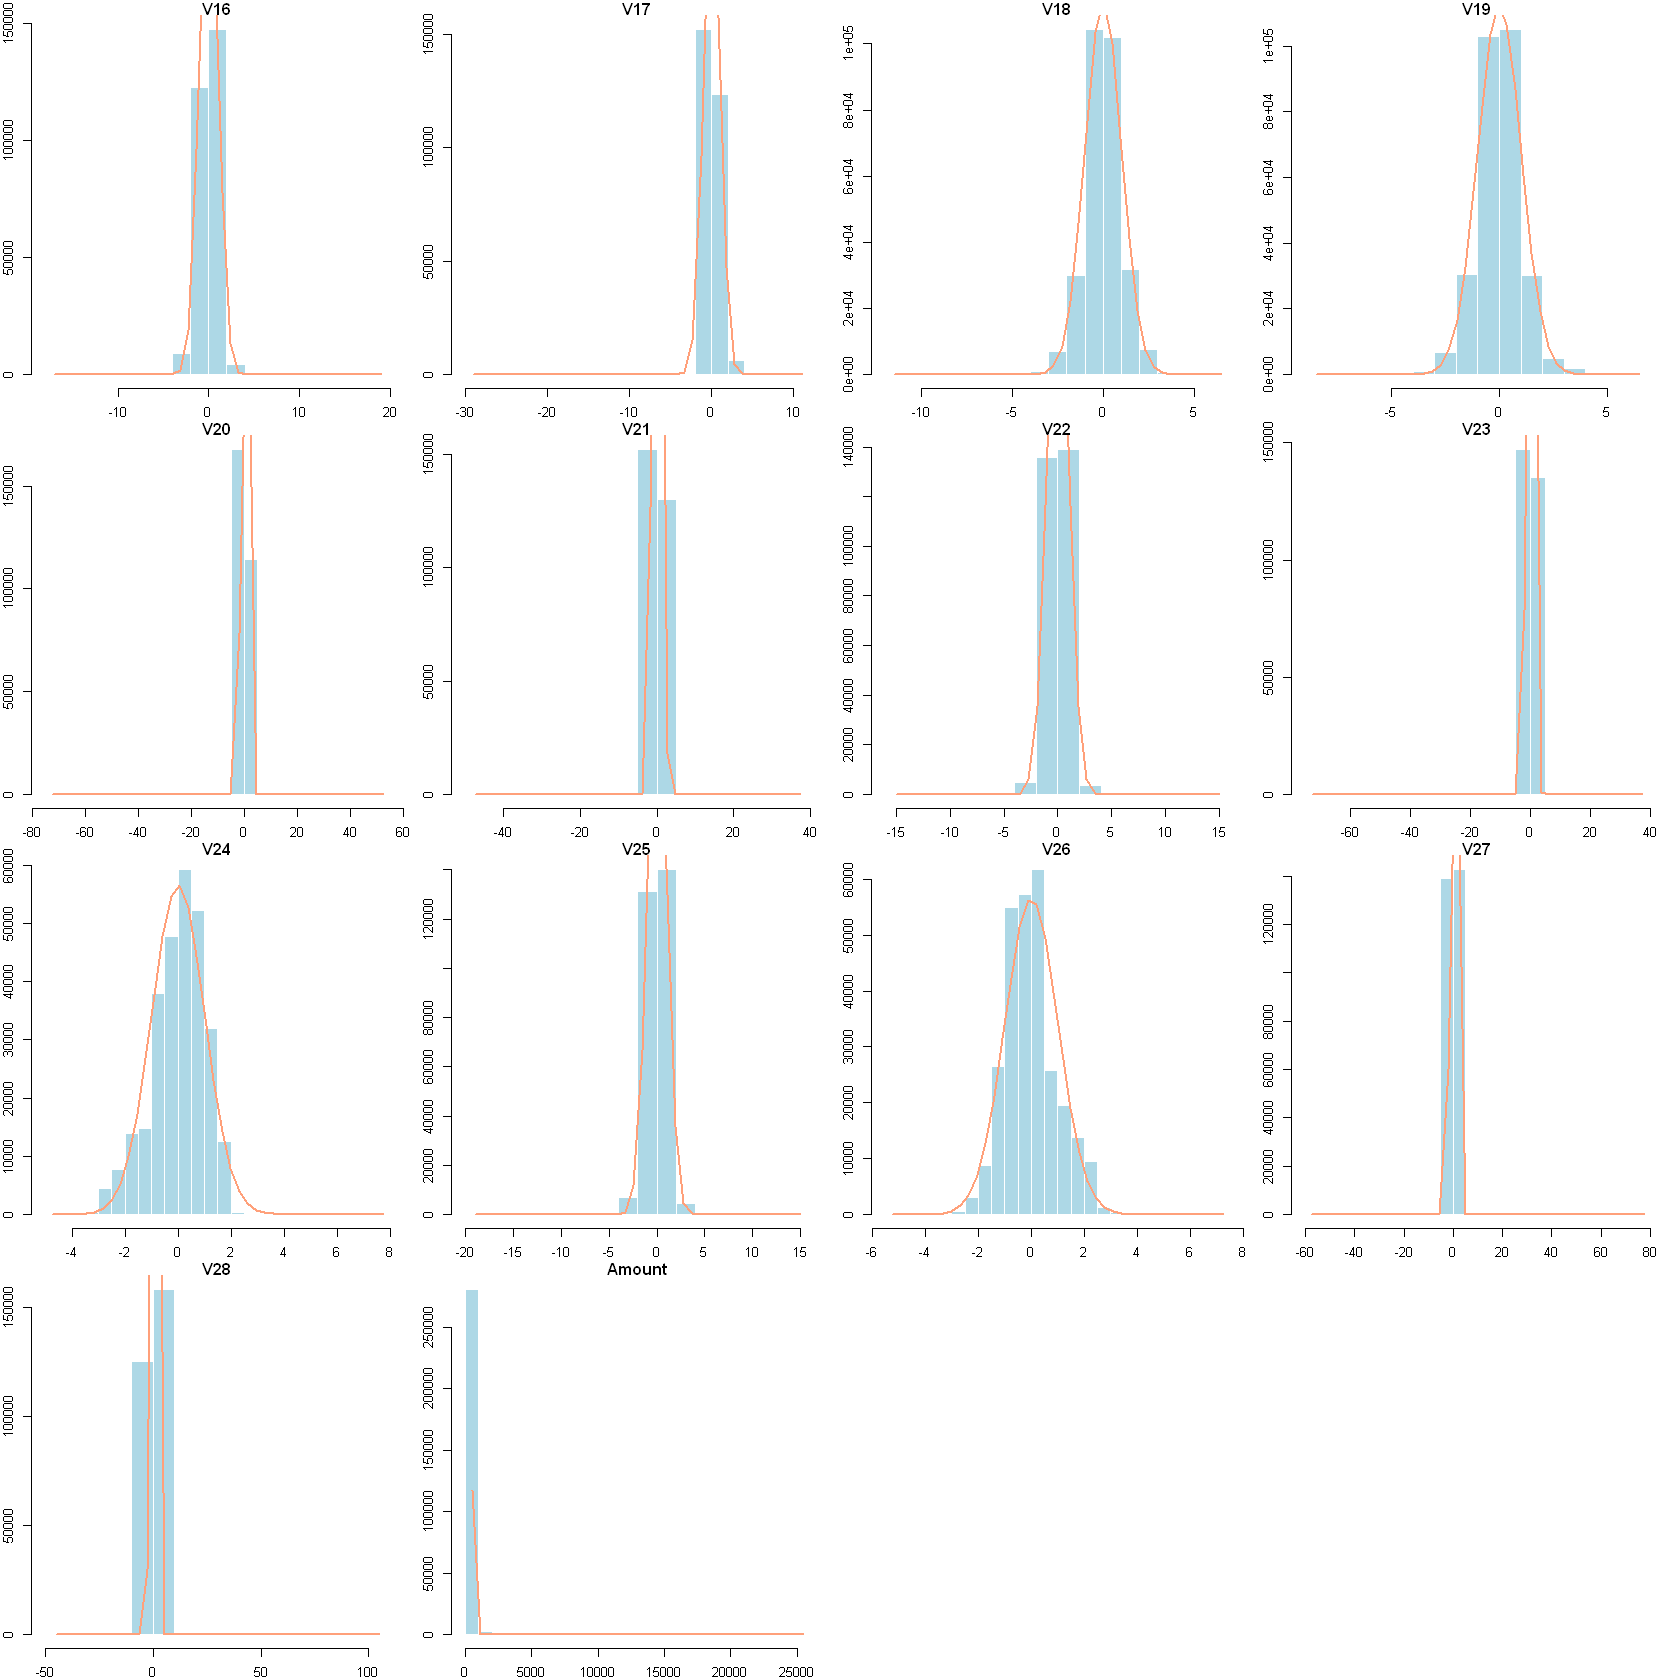

In [19]:
par(mfrow=c(4, 4))
par(mar=c(2, 2, 1, 1))
options(repr.plot.width=14, repr.plot.height=14)

light_blue <- "#ADD8E6"
light_red <- "#FFA07A"

for (col in names(fraud_data)) {
  if (is.numeric(fraud_data[[col]])) {
    h <- hist(fraud_data[[col]], main=col, xlab=NULL, col=light_blue, border="white")
    xfit <- seq(min(h$mids), max(h$mids), length=40)
    yfit <- dnorm(xfit, mean=mean(fraud_data[[col]]), sd=sd(fraud_data[[col]]))
    yfit <- yfit * diff(h$mids[1:2]) * length(fraud_data[[col]])
    lines(xfit, yfit, col=light_red, lwd=2)
  }
}


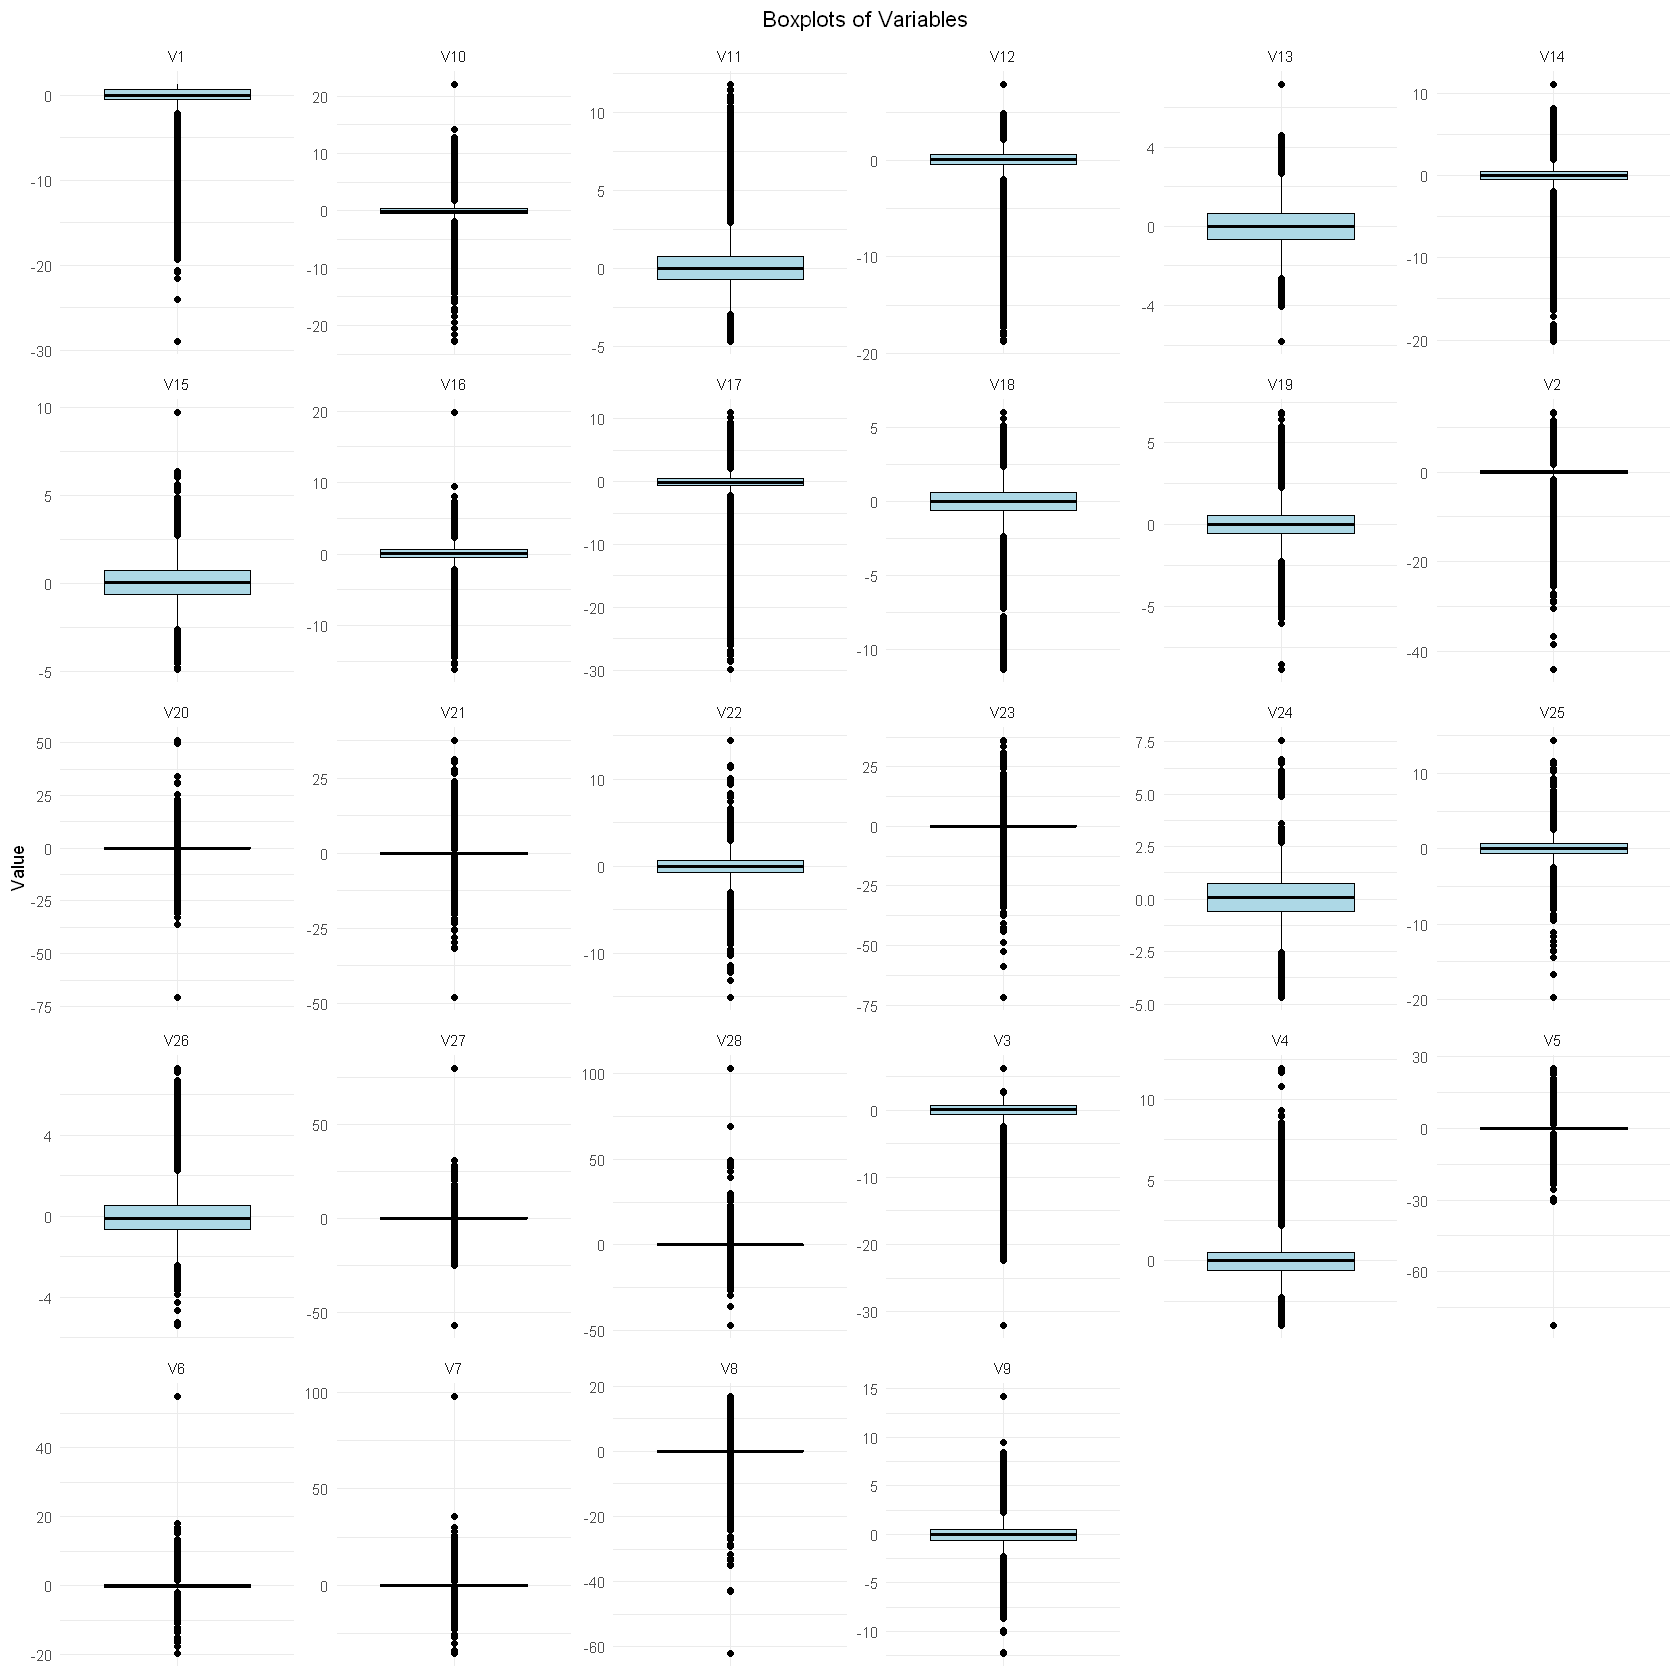

In [20]:
library(dplyr)
library(tidyr)
library(ggplot2)

fraud_data_long <- fraud_data %>%
  as_tibble() %>%  # Convert to tibble to avoid the error
  select(-Time, -Class) %>%  # Exclude 'Time' and 'Class' columns
  pivot_longer(cols = -Amount, names_to = "Variable", values_to = "Value")

# Create separate boxplots for each variable
boxplots <- ggplot(fraud_data_long, aes(x = Variable, y = Value)) +
  geom_boxplot(fill = "#ADD8E6", color = "black") +
  labs(title = "Boxplots of Variables",
       x = NULL,  # Remove x-axis label
       y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),  # Remove x-axis labels
        strip.placement = "bottom",   # Place facet strip labels at the bottom
        plot.title = element_text(hjust = 0.5)) +  # Center title
  facet_wrap(~ Variable, scales = "free")  # Facet by variable with free scales

# Display the boxplots
print(boxplots)

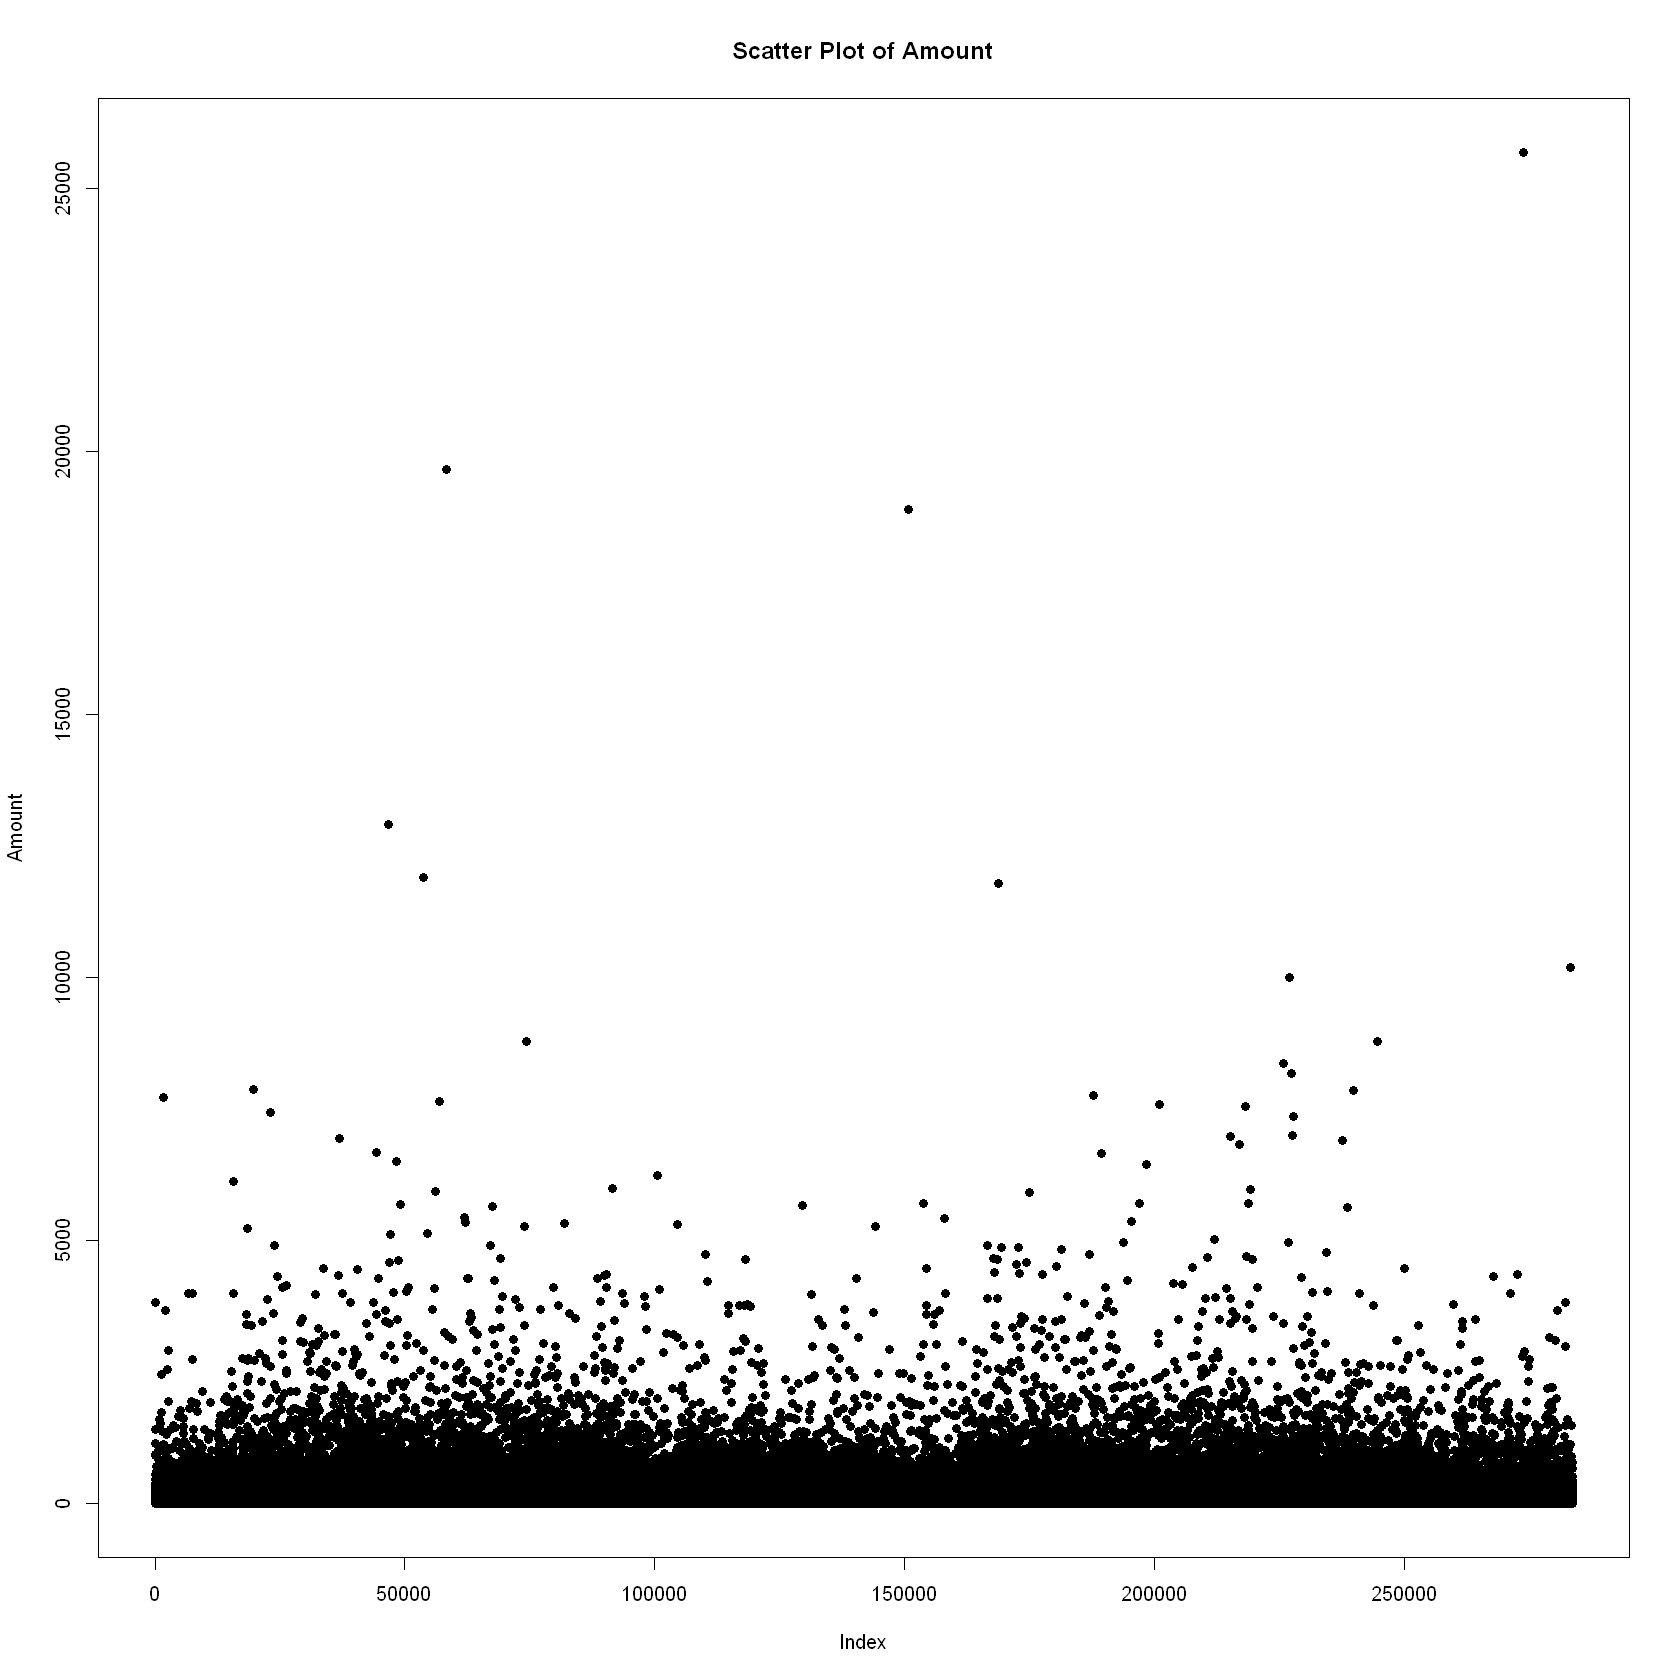

In [21]:
plot(fraud_data$Amount, 
     xlab = "Index", 
     ylab = "Amount", 
     main = "Scatter Plot of Amount",
     col = "black", 
     pch = 16) 

## LOGISTIC REGRESSION

Model using all variables

In [22]:
model1 <- glm(Class ~ ., data=fraud_data, family=binomial)
summary(model1)


Call:
glm(formula = Class ~ ., family = binomial, data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.398e+00  2.499e-01 -33.602  < 2e-16 ***
Time        -3.676e-06  2.259e-06  -1.627 0.103644    
V1           1.873e-01  8.251e-02   2.270 0.023223 *  
V2           1.747e-02  9.585e-02   0.182 0.855338    
V3          -1.258e-02  8.012e-02  -0.157 0.875214    
V4           9.918e-01  1.046e-01   9.484  < 2e-16 ***
V5           1.797e-01  9.206e-02   1.952 0.050930 .  
V6          -1.651e-01  9.879e-02  -1.671 0.094654 .  
V7          -1.164e-01  8.192e-02  -1.421 0.155426    
V8          -2.082e-01  3.609e-02  -5.769 7.95e-09 ***
V9          -3.095e-01  1.213e-01  -2.551 0.010746 *  
V10         -8.859e-01  1.043e-01  -8.497  < 2e-16 ***
V11         -5.899e-02  8.292e-02  -0.711 0.476836    
V12          8.268e-02  8.653e-02   0.955 0.339352    
V13         -3.242e-01  8.133e-02  -3.986 6.71e-05 ***
V14         -5.215e-01  5.936e-02  

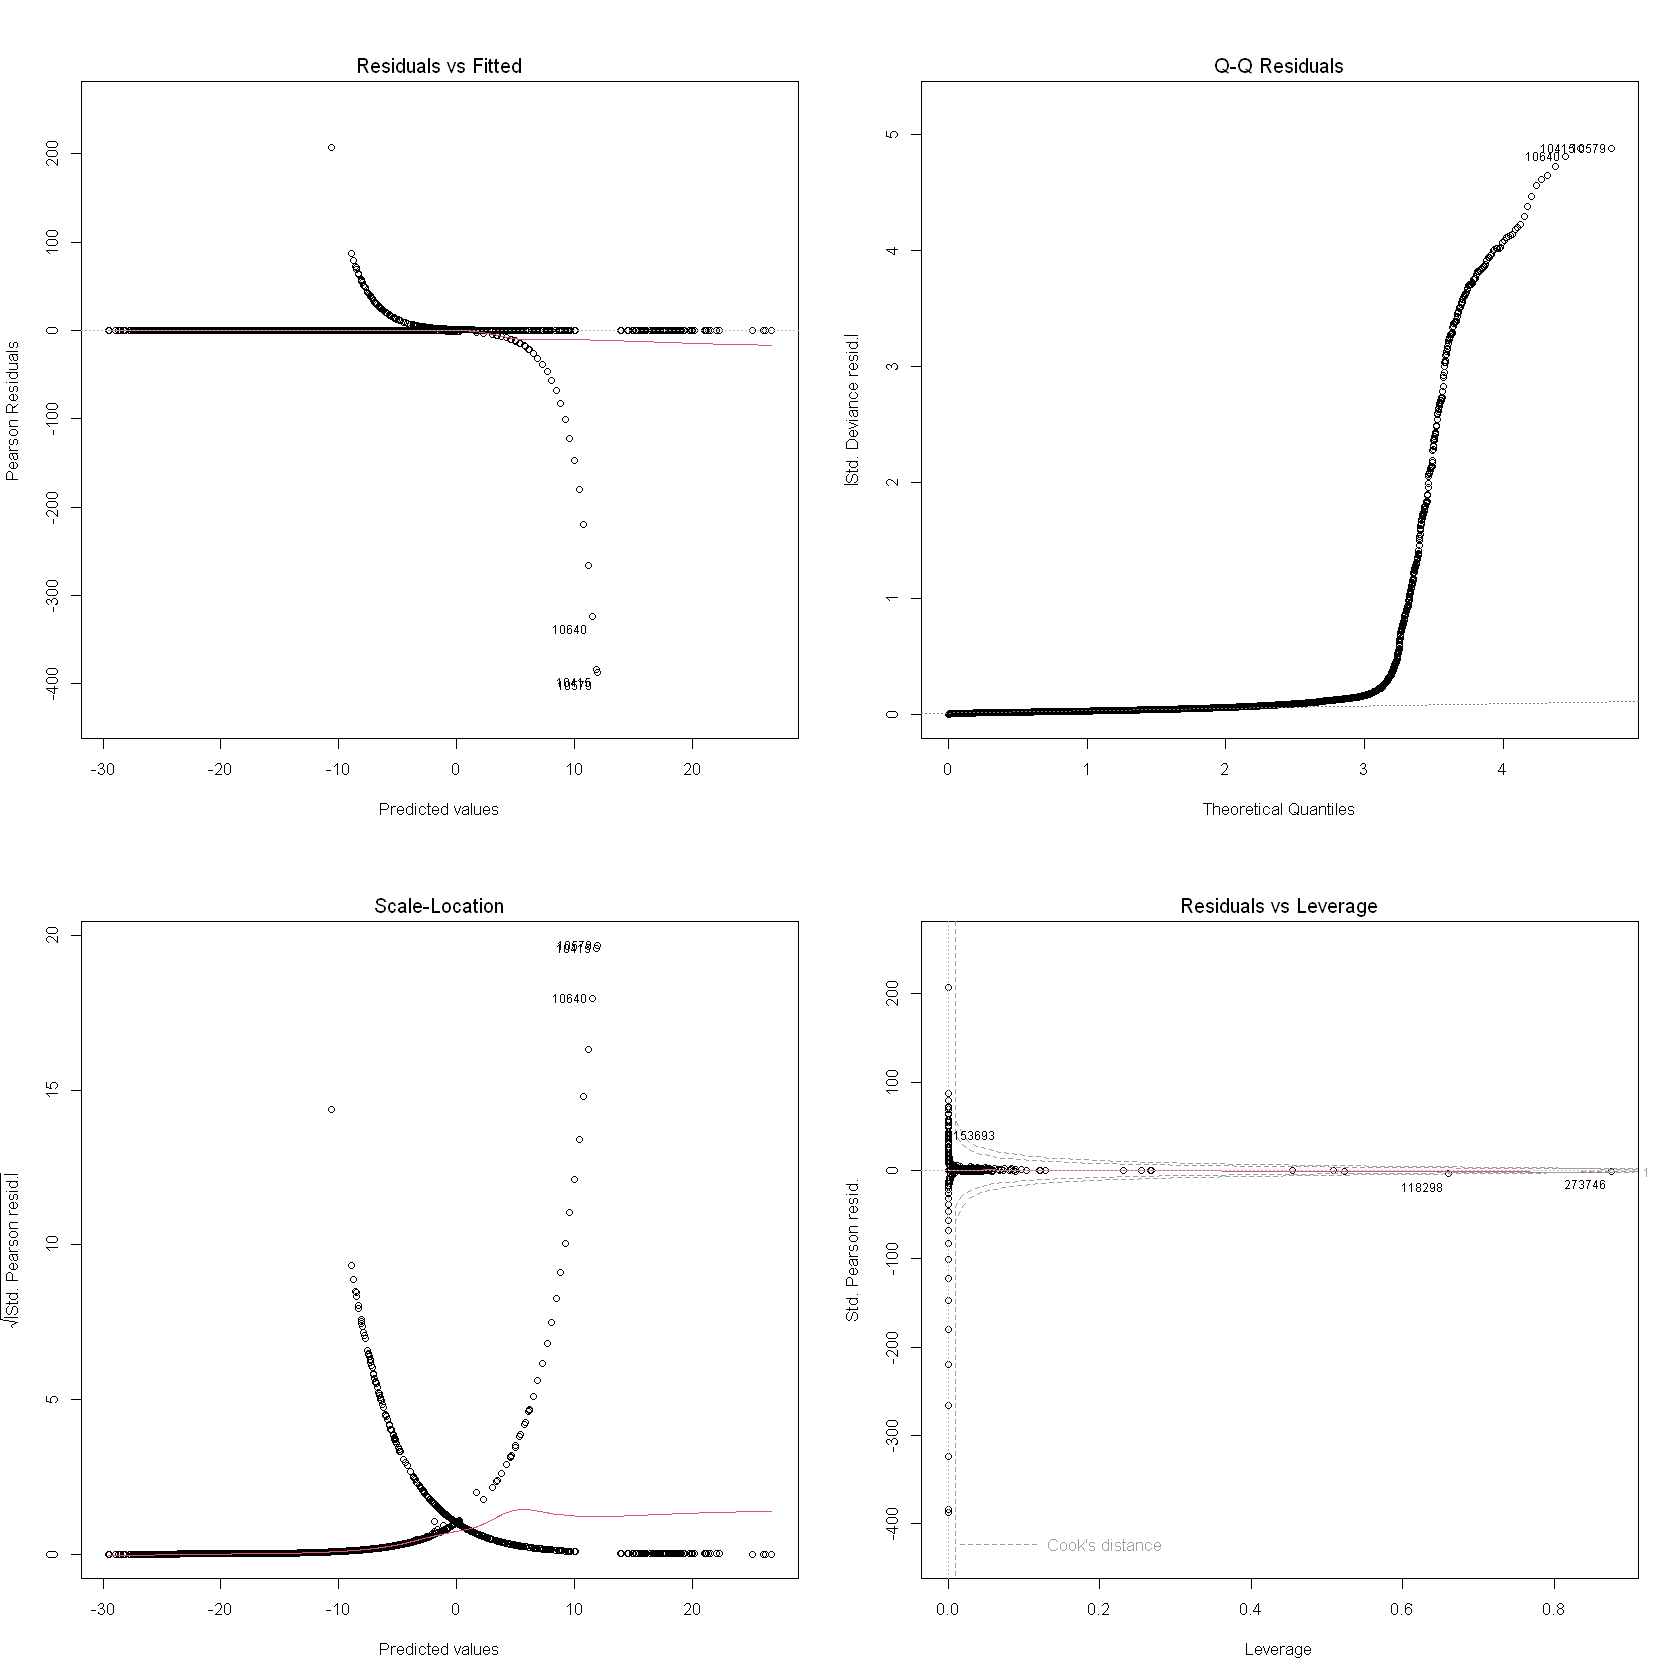

In [23]:
par(mfrow=c(2,2))
plot(model1)

In [27]:
actual <- fraud_data$Class
predicted <- round(fitted(model1))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

# Display confusion matrix data frame
conf_matrix_df

,0,1
,<int>,<int>
0,283211,42
1,184,289


In [30]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 99.9%"


In [31]:
model_2_formula <- as.formula("Class ~ . - V2 - V3 - V6 - V7 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26")

model2 <- glm(formula = model_2_formula, family = binomial, data = fraud_data)

summary(model2)


Call:
glm(formula = model_2_formula, family = binomial, data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.433e+00  2.003e-01 -42.090  < 2e-16 ***
Time        -3.418e-06  1.724e-06  -1.983  0.04739 *  
V1           4.760e-02  5.377e-02   0.885  0.37594    
V4           1.014e+00  8.298e-02  12.226  < 2e-16 ***
V5           1.220e-01  4.795e-02   2.545  0.01092 *  
V8          -1.811e-01  2.358e-02  -7.680 1.59e-14 ***
V9          -1.663e-01  8.908e-02  -1.867  0.06196 .  
V10         -9.736e-01  8.830e-02 -11.026  < 2e-16 ***
V13         -3.310e-01  7.646e-02  -4.329 1.50e-05 ***
V14         -4.926e-01  4.628e-02 -10.645  < 2e-16 ***
V20         -2.027e-01  4.113e-02  -4.928 8.33e-07 ***
V21          3.806e-01  3.575e-02  10.648  < 2e-16 ***
V22          6.269e-01  8.613e-02   7.279 3.36e-13 ***
V23         -9.934e-02  3.286e-02  -3.024  0.00250 ** 
V27         -2.891e-01  4.561e-02  -6.338 2.33e-10 ***
V28         -8.435e-02  3.241

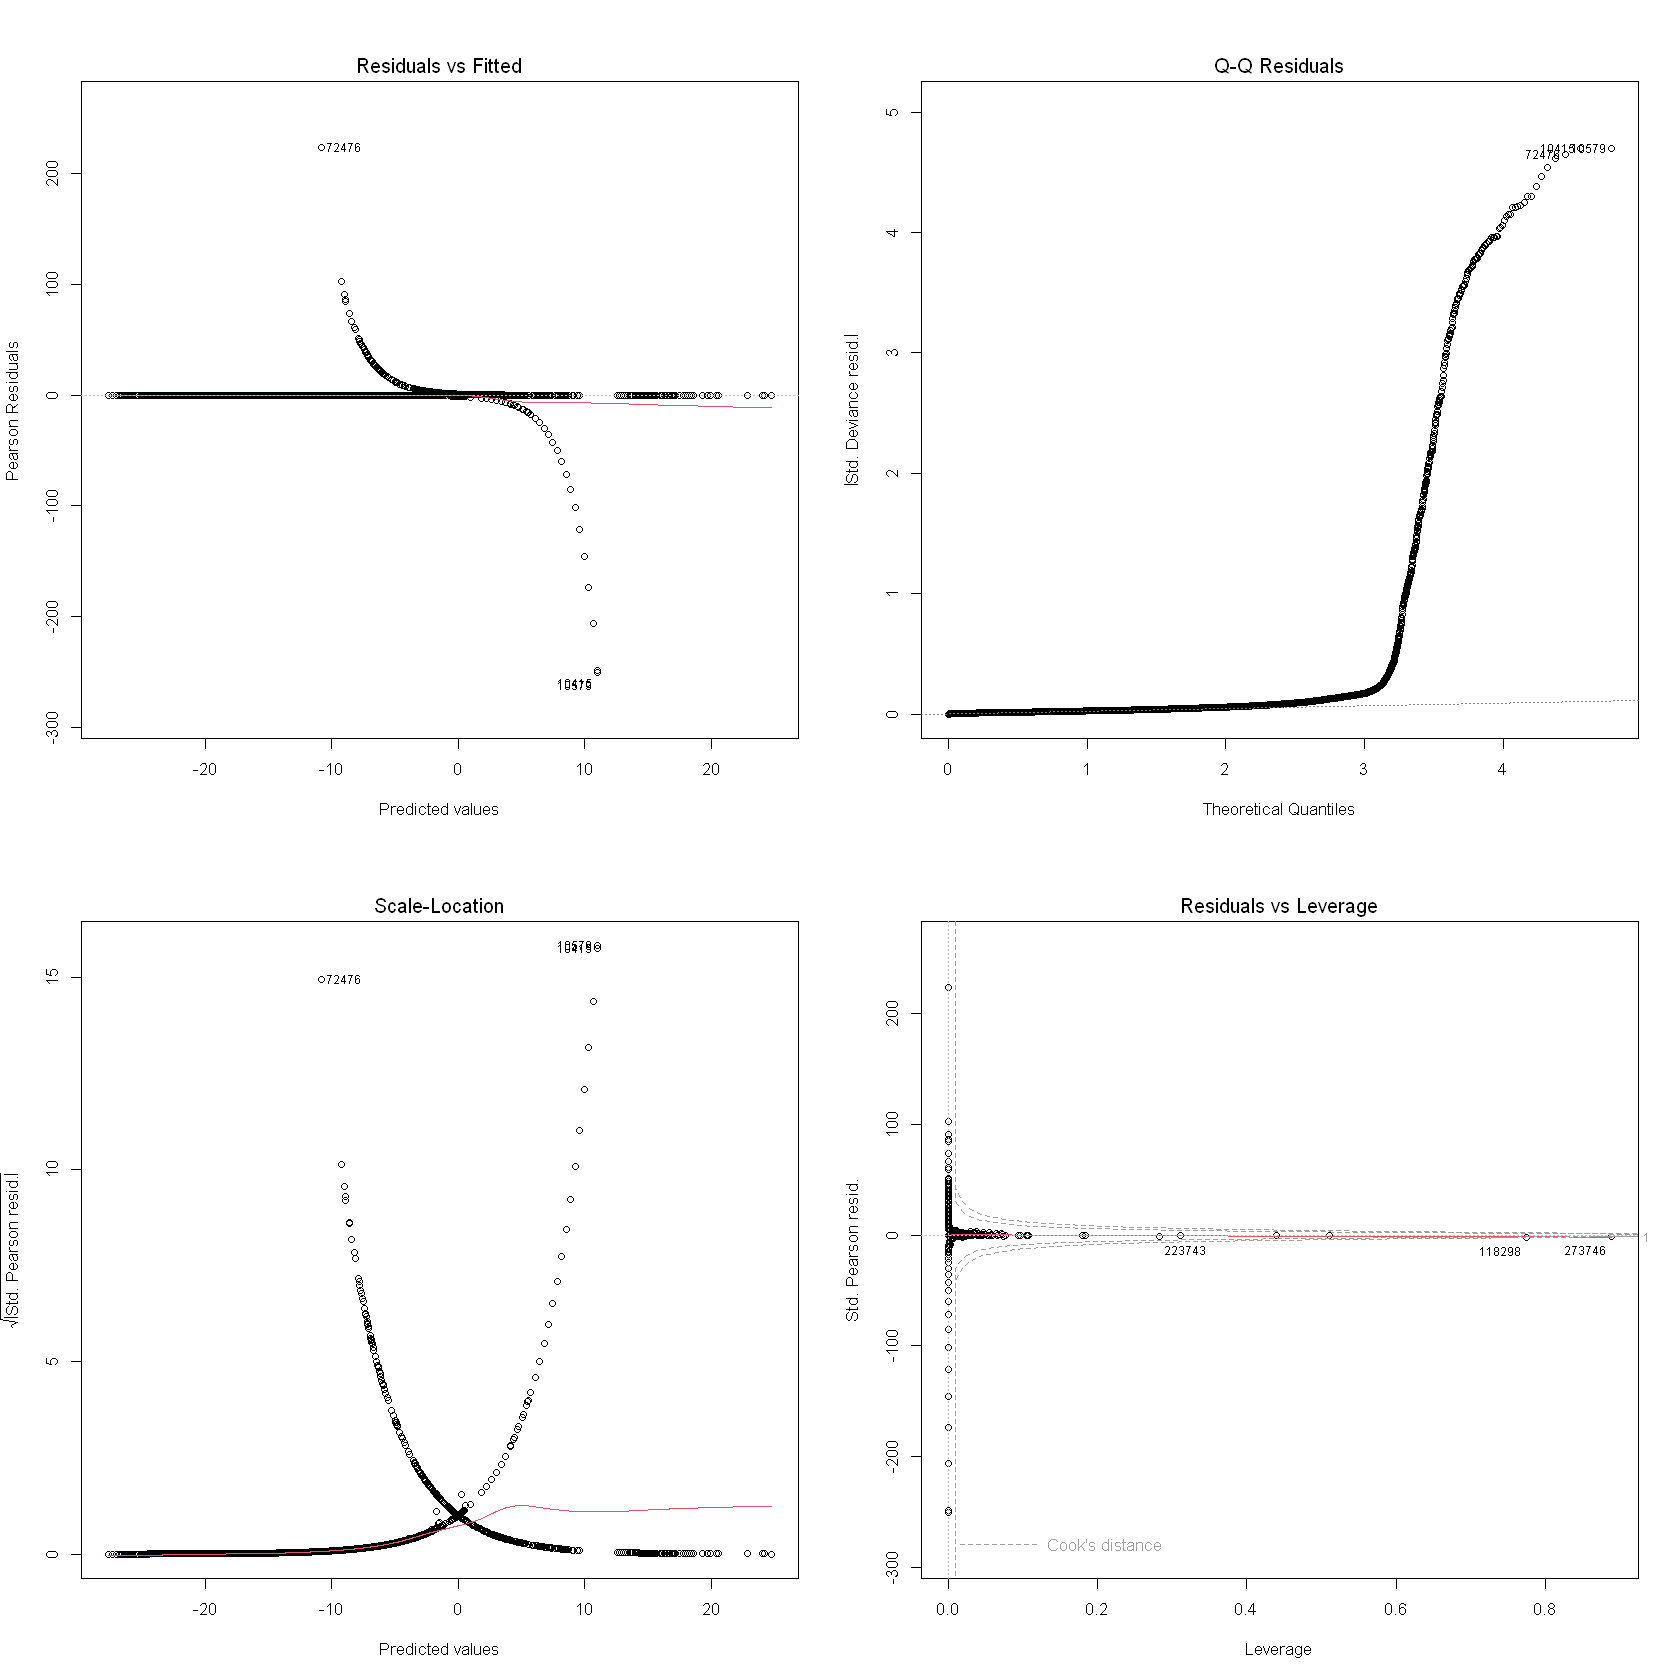

In [32]:
par(mfrow=c(2,2))
plot(model2)

In [33]:
actual <- fraud_data$Class
predicted <- round(fitted(model2))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

conf_matrix_df

,0,1
,<int>,<int>
0,283203,50
1,189,284


In [35]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 99.9%"


In [36]:
model_3_formula <- as.formula("Class ~ . - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 - Amount")

model3 <- glm(formula = model_3_formula, family = binomial, data = fraud_data)

summary(model3)


Call:
glm(formula = model_3_formula, family = binomial, data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.501e+00  1.968e-01 -43.195  < 2e-16 ***
Time        -2.886e-06  1.663e-06  -1.736  0.08260 .  
V4           1.022e+00  6.508e-02  15.706  < 2e-16 ***
V5           1.325e-01  3.225e-02   4.110 3.96e-05 ***
V8          -1.808e-01  2.156e-02  -8.387  < 2e-16 ***
V10         -9.565e-01  7.320e-02 -13.067  < 2e-16 ***
V13         -3.399e-01  7.468e-02  -4.551 5.33e-06 ***
V14         -5.239e-01  4.130e-02 -12.685  < 2e-16 ***
V20         -1.678e-01  3.185e-02  -5.269 1.37e-07 ***
V21          3.715e-01  3.505e-02  10.598  < 2e-16 ***
V22          6.409e-01  8.351e-02   7.675 1.66e-14 ***
V23         -8.792e-02  2.851e-02  -3.084  0.00204 ** 
V27         -2.392e-01  3.677e-02  -6.505 7.77e-11 ***
V28         -7.591e-02  2.665e-02  -2.848  0.00439 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion para

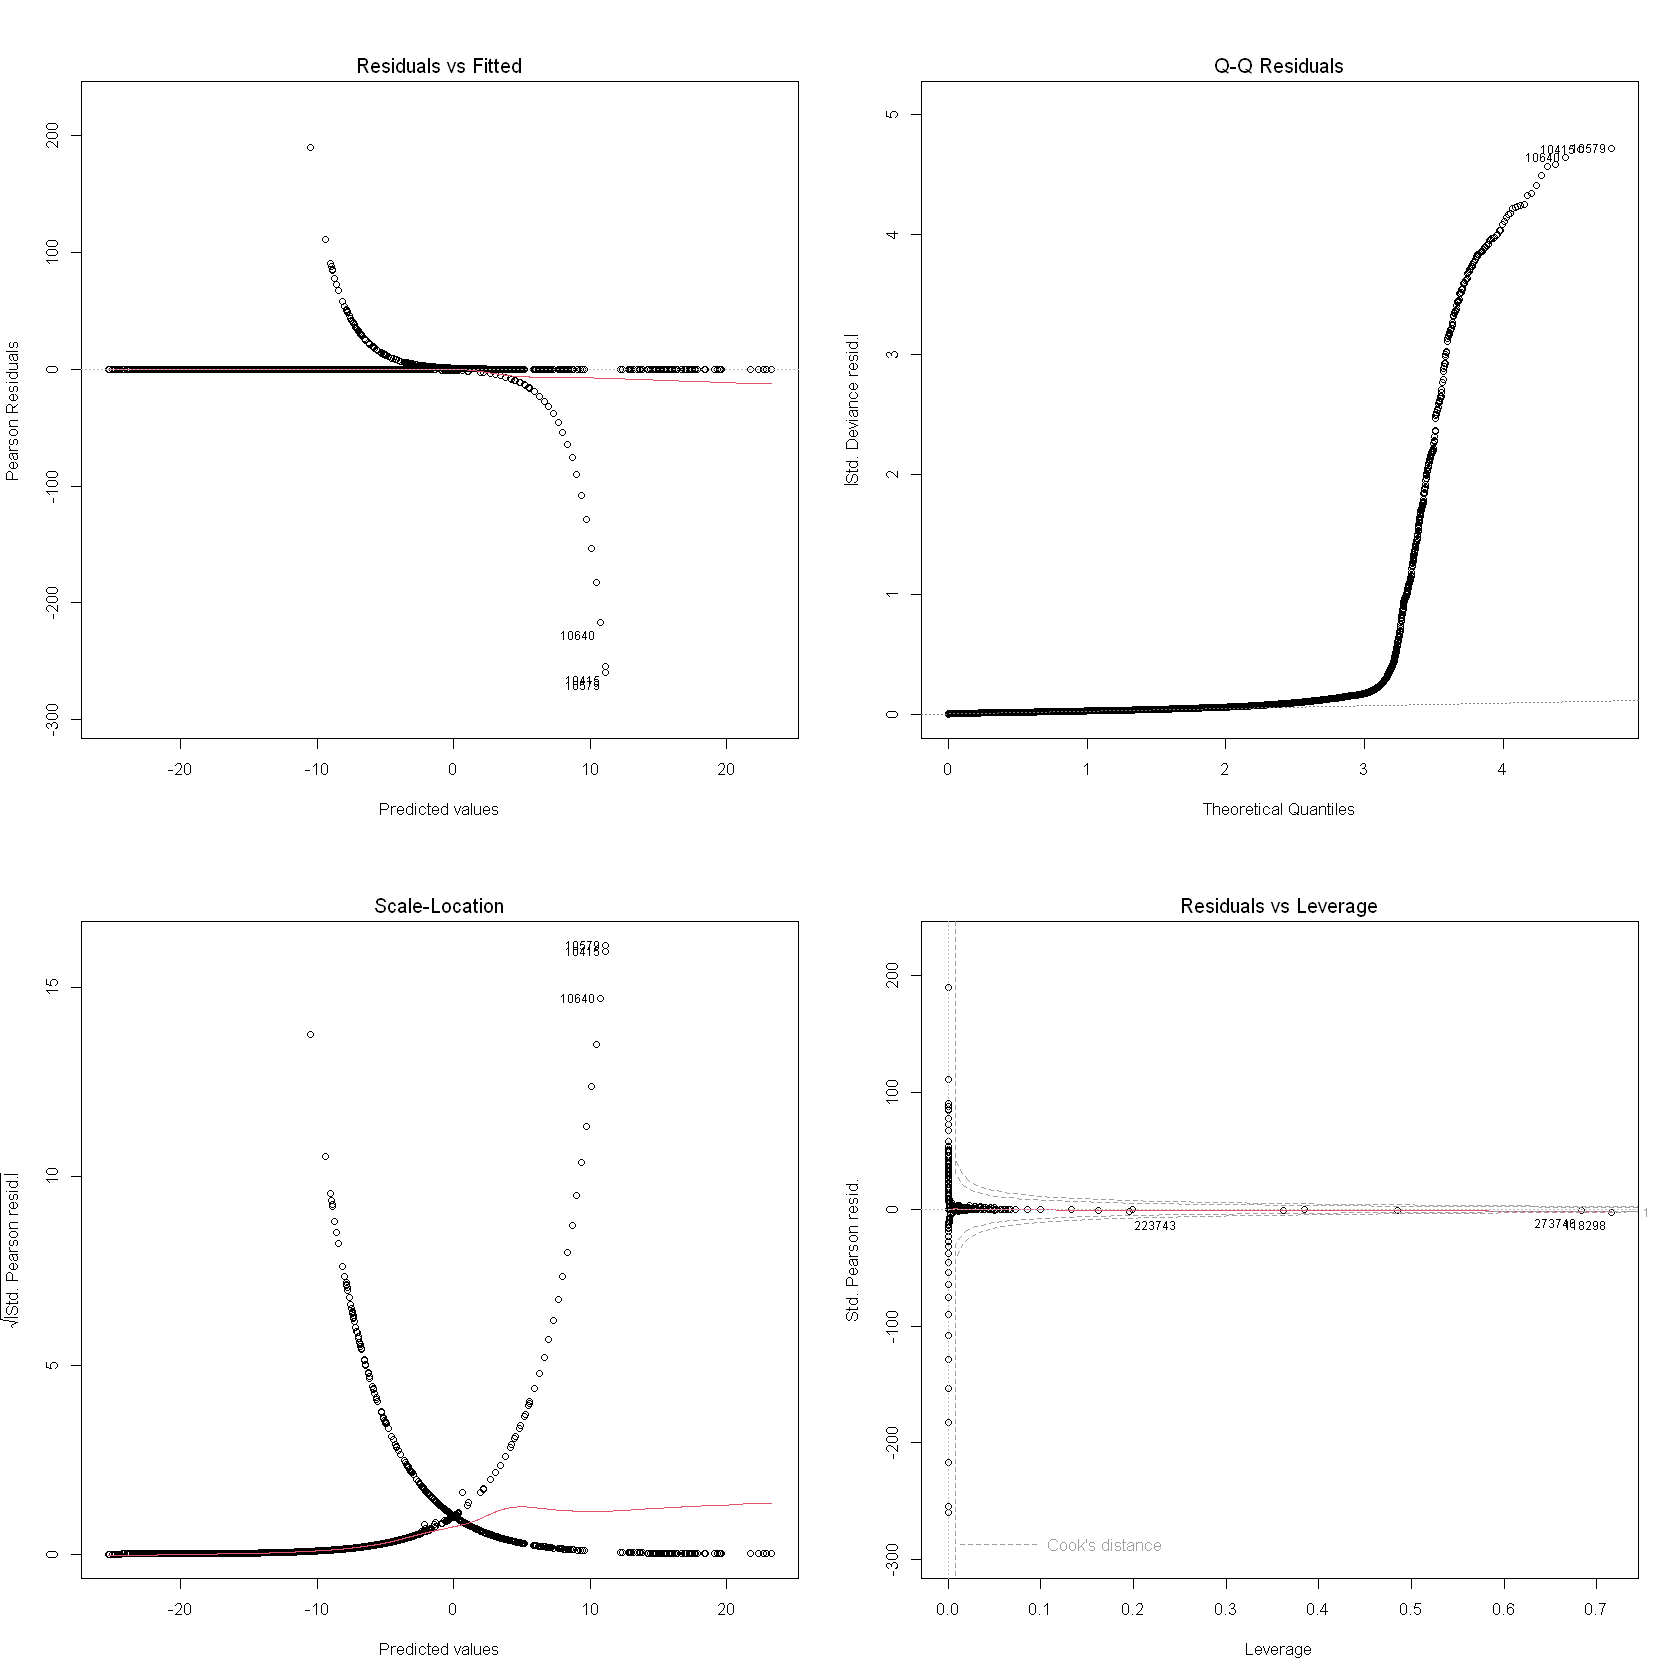

In [37]:
par(mfrow=c(2,2))
plot(model3)

In [38]:
actual <- fraud_data$Class
predicted <- round(fitted(model3))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

# Display confusion matrix data frame
conf_matrix_df

,0,1
,<int>,<int>
0,283204,49
1,190,283


In [39]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 99.9%"


THE ACCURACY WILL ALWAYS BE AROUND 99% SO NOW DATA IMBALANCE NEEDS TO BE HANDELED

UPSAMPLING

In [62]:
up_fraud_data <- upSample(x=fraud_data[,-ncol(fraud_data)], y=fraud_data$Class)
up_fraud_data$Class <- as.factor(up_fraud_data$Class)

In [63]:
summary(up_fraud_data$Class)

0      1 
283253 283253

In [115]:
model4 <- glm(Class ~ ., data=up_fraud_data, family=binomial)
summary(model4)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.445e+00  3.368e-02 -102.285  < 2e-16 ***
Time        -8.068e-06  2.126e-07  -37.955  < 2e-16 ***
V1           1.319e+00  2.981e-02   44.244  < 2e-16 ***
V2           9.808e-01  3.749e-02   26.160  < 2e-16 ***
V3           4.191e-01  1.810e-02   23.159  < 2e-16 ***
V4           1.063e+00  1.013e-02  104.891  < 2e-16 ***
V5           1.055e+00  2.443e-02   43.176  < 2e-16 ***
V6          -7.193e-01  1.542e-02  -46.631  < 2e-16 ***
V7          -7.044e-01  2.667e-02  -26.412  < 2e-16 ***
V8          -4.925e-01  8.824e-03  -55.818  < 2e-16 ***
V9          -3.453e-01  1.111e-02  -31.093  < 2e-16 ***
V10         -7.632e-01  1.501e-02  -50.859  < 2e-16 ***
V11          4.948e-01  9.895e-03   50.005  < 2e-16 ***
V12         -1.037e+00  1.410e-02  -73.494  < 2e-16 ***
V13         -3.667e-01  6.705e-03  -54.693  < 2e-16 ***
V14         -1.3

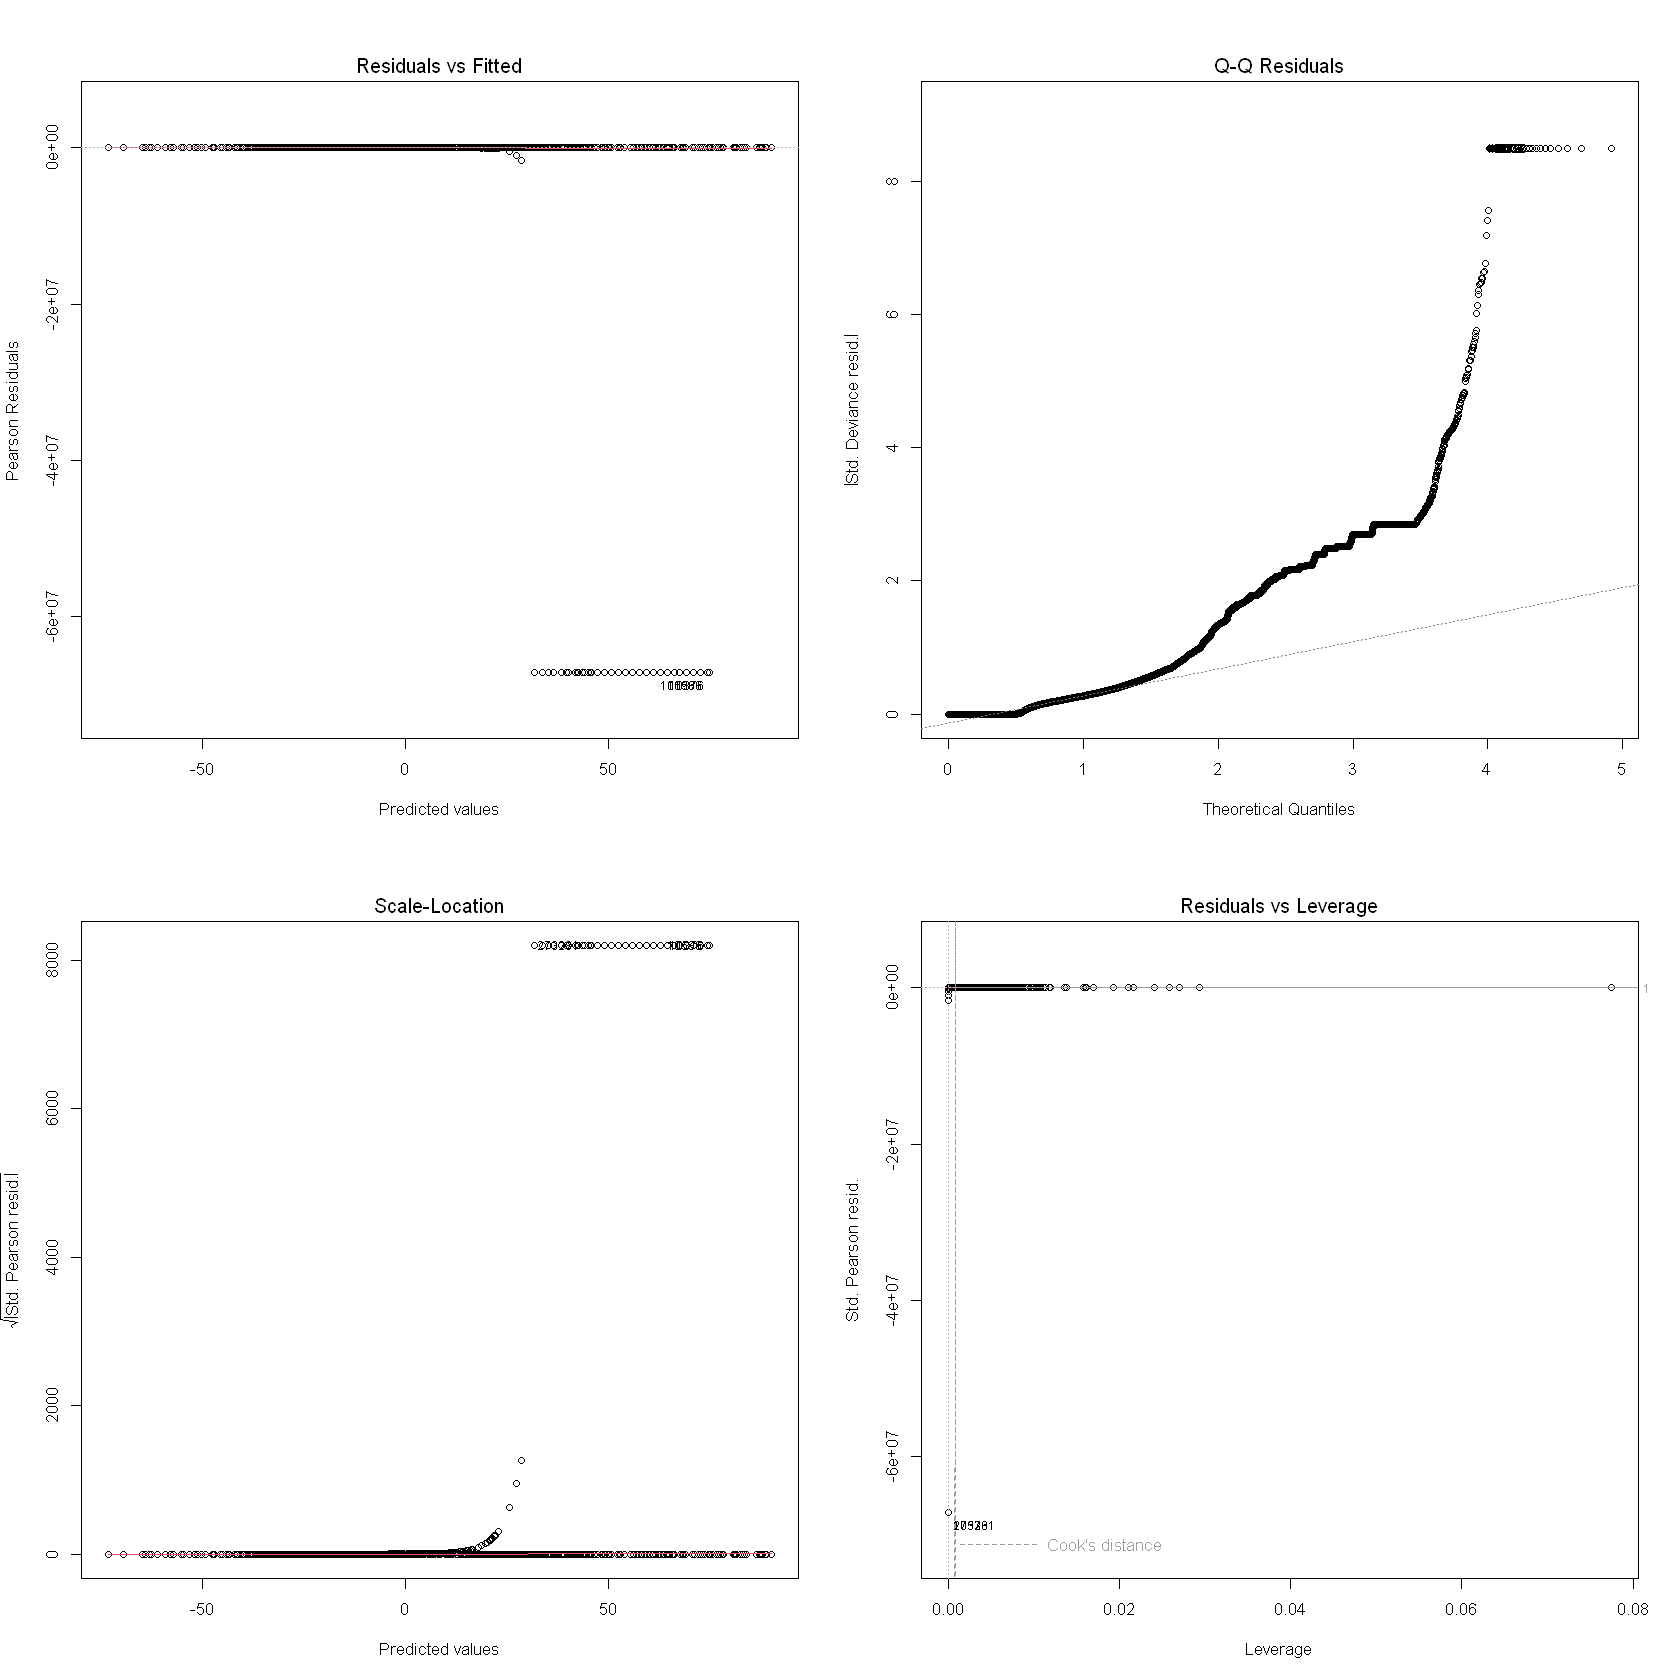

In [65]:
par(mfrow=c(2,2))
plot(model4)

In [66]:
actual <- up_fraud_data$Class
predicted <- round(fitted(model4))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

# Display confusion matrix data frame
conf_matrix_df

,0,1
,<int>,<int>
0,276660,6593
1,22919,260334


In [67]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 94.8%"


In [68]:
model5 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=up_fraud_data, family=binomial)
summary(model5)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.892e+00  1.699e-02 -170.167  < 2e-16 ***
Time        -5.682e-06  1.656e-07  -34.313  < 2e-16 ***
V1           3.207e-01  8.696e-03   36.880  < 2e-16 ***
V4           1.129e+00  7.573e-03  149.063  < 2e-16 ***
V5           2.334e-01  6.935e-03   33.658  < 2e-16 ***
V6          -4.364e-01  9.466e-03  -46.101  < 2e-16 ***
V7          -2.229e-02  8.116e-03   -2.746  0.00603 ** 
V8          -4.142e-01  5.761e-03  -71.903  < 2e-16 ***
V9          -2.823e-01  8.784e-03  -32.135  < 2e-16 ***
V10         -5.416e-01  1.005e-02  -53.899  < 2e-16 ***
V11          2.786e-01  6.866e-03   40.581  < 2e-16 ***
V12         -6.467e-01  7.240e-03  -89.334  < 2e-16 ***
V13         -3.135e-01  6.384e-03  -49.113  < 2e-16 ***
V14         -8.148e-01  6.520e-03 -124.970  < 2e-16 ***
V15         -1.358e-01  6.607e-03

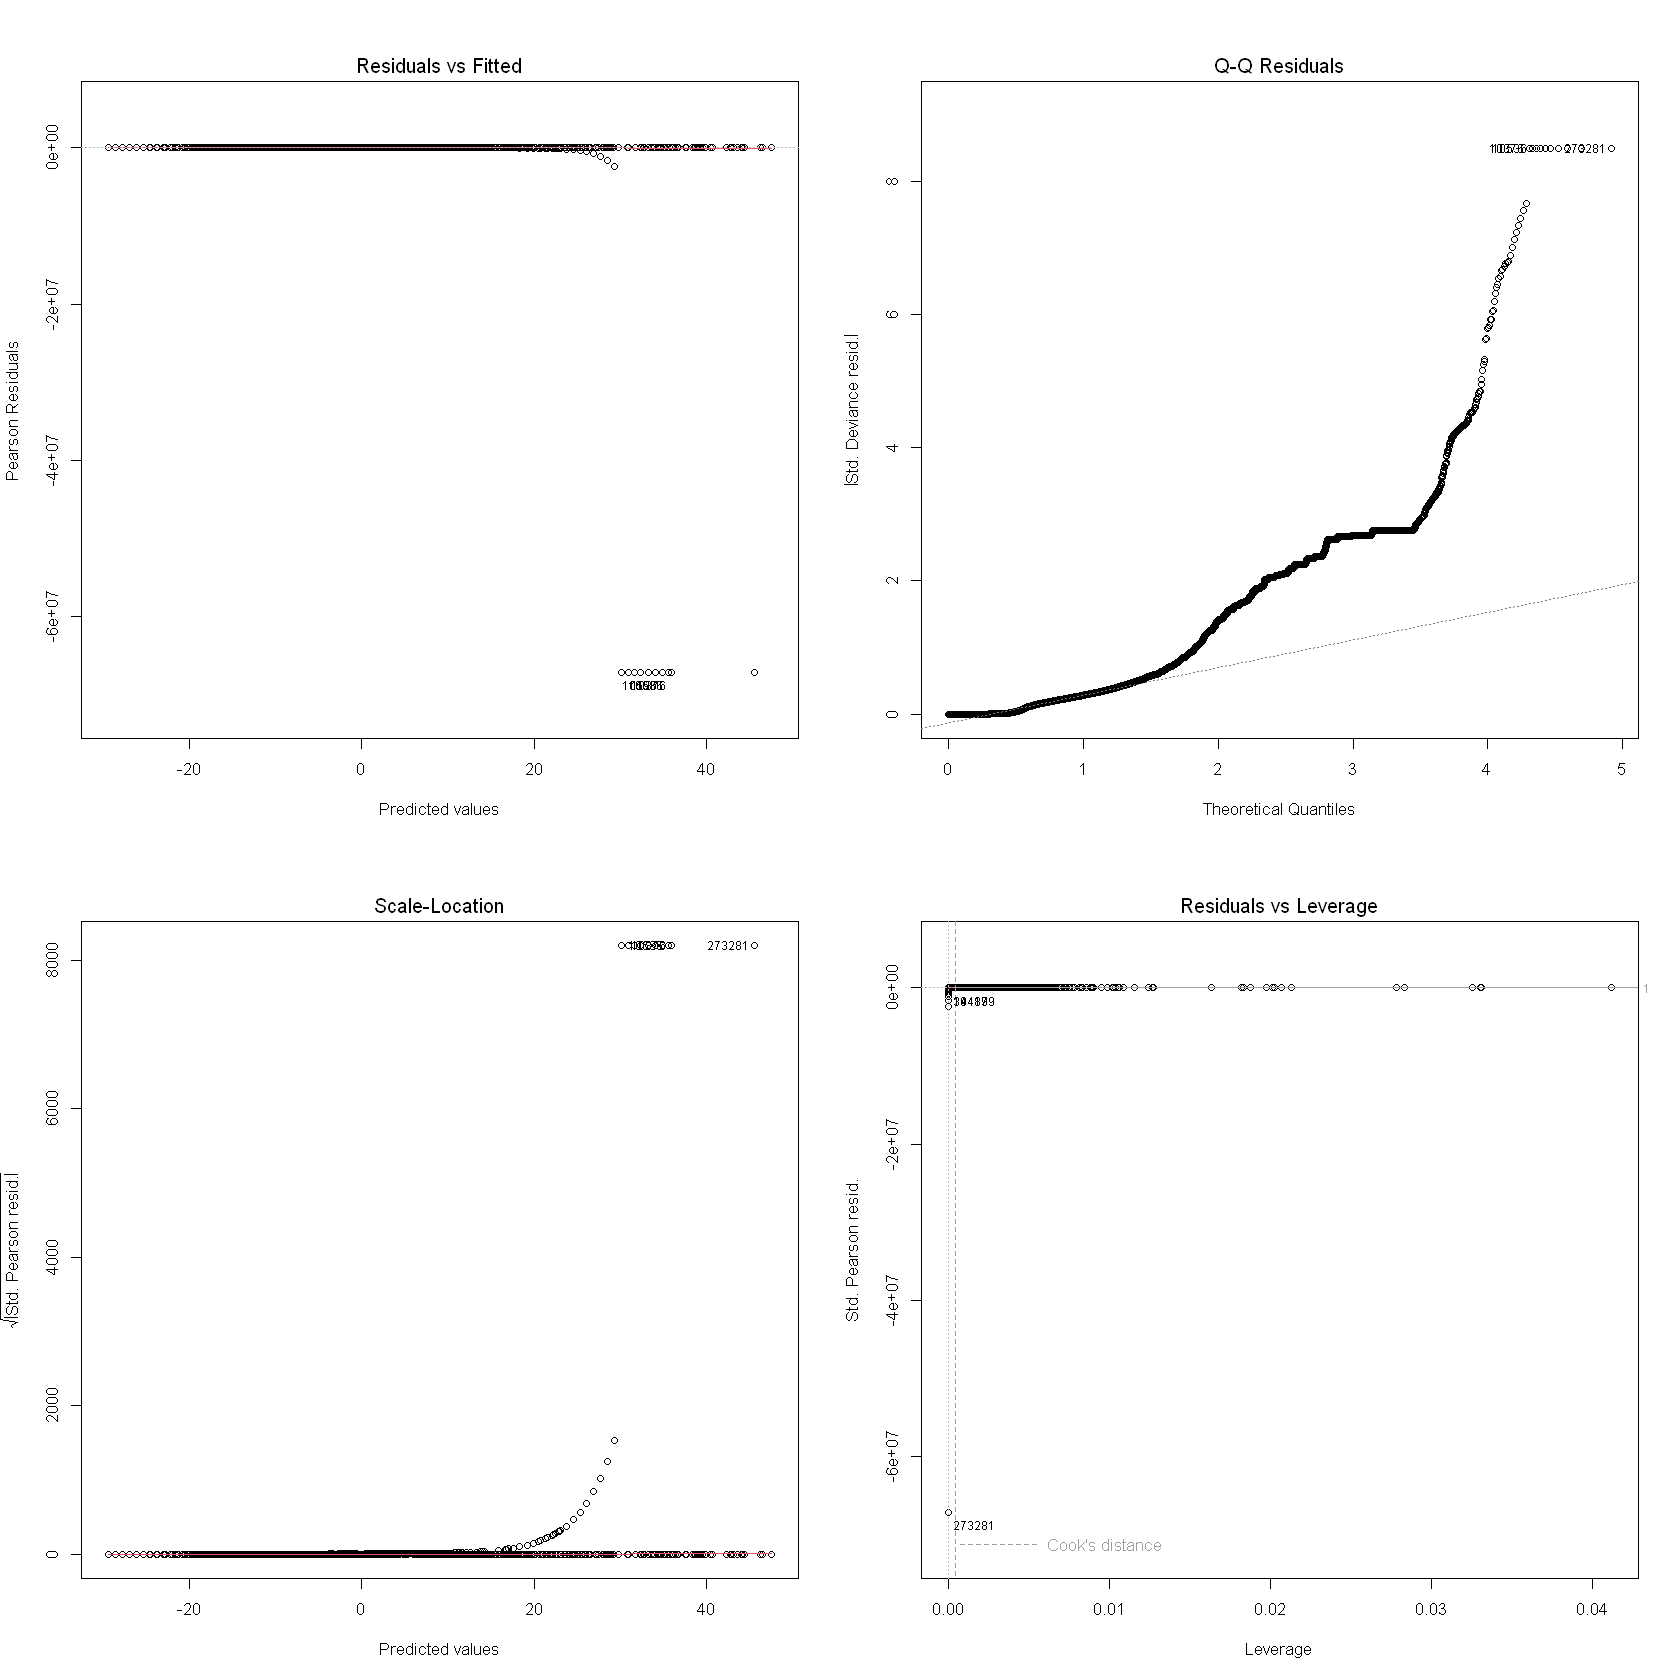

In [69]:
par(mfrow=c(2,2))
plot(model5)

In [70]:
actual <- up_fraud_data$Class
predicted <- round(fitted(model5))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

# Display confusion matrix data frame
conf_matrix_df

,0,1
,<int>,<int>
0,276057,7196
1,25189,258064


In [71]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 94.3%"


In [51]:
model6 <- glm(Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V19 - V24, data=up_fraud_data, family = "binomial")
summary(model6)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - 
    V15 - V19 - V24 - V28, family = "binomial", data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.728e+00  1.633e-02 -166.993  < 2e-16 ***
Time        -6.804e-06  1.507e-07  -45.138  < 2e-16 ***
V1           1.547e-01  6.288e-03   24.608  < 2e-16 ***
V4           1.382e+00  7.723e-03  178.911  < 2e-16 ***
V5           3.575e-01  6.064e-03   58.955  < 2e-16 ***
V8          -3.013e-01  5.029e-03  -59.917  < 2e-16 ***
V10         -8.011e-01  1.050e-02  -76.265  < 2e-16 ***
V13         -3.240e-01  6.293e-03  -51.483  < 2e-16 ***
V14         -7.957e-01  6.669e-03 -119.308  < 2e-16 ***
V16         -2.704e-01  7.574e-03  -35.705  < 2e-16 ***
V17         -1.842e-01  5.915e-03  -31.139  < 2e-16 ***
V18          7.977e-02  8.071e-03    9.883  < 2e-16 ***
V20         -2.605e-01  6.834e-03  -38.122  < 2e-16 ***
V21          1.375e-01  5.100e-03   26.957  < 2e-16 ***
V22 

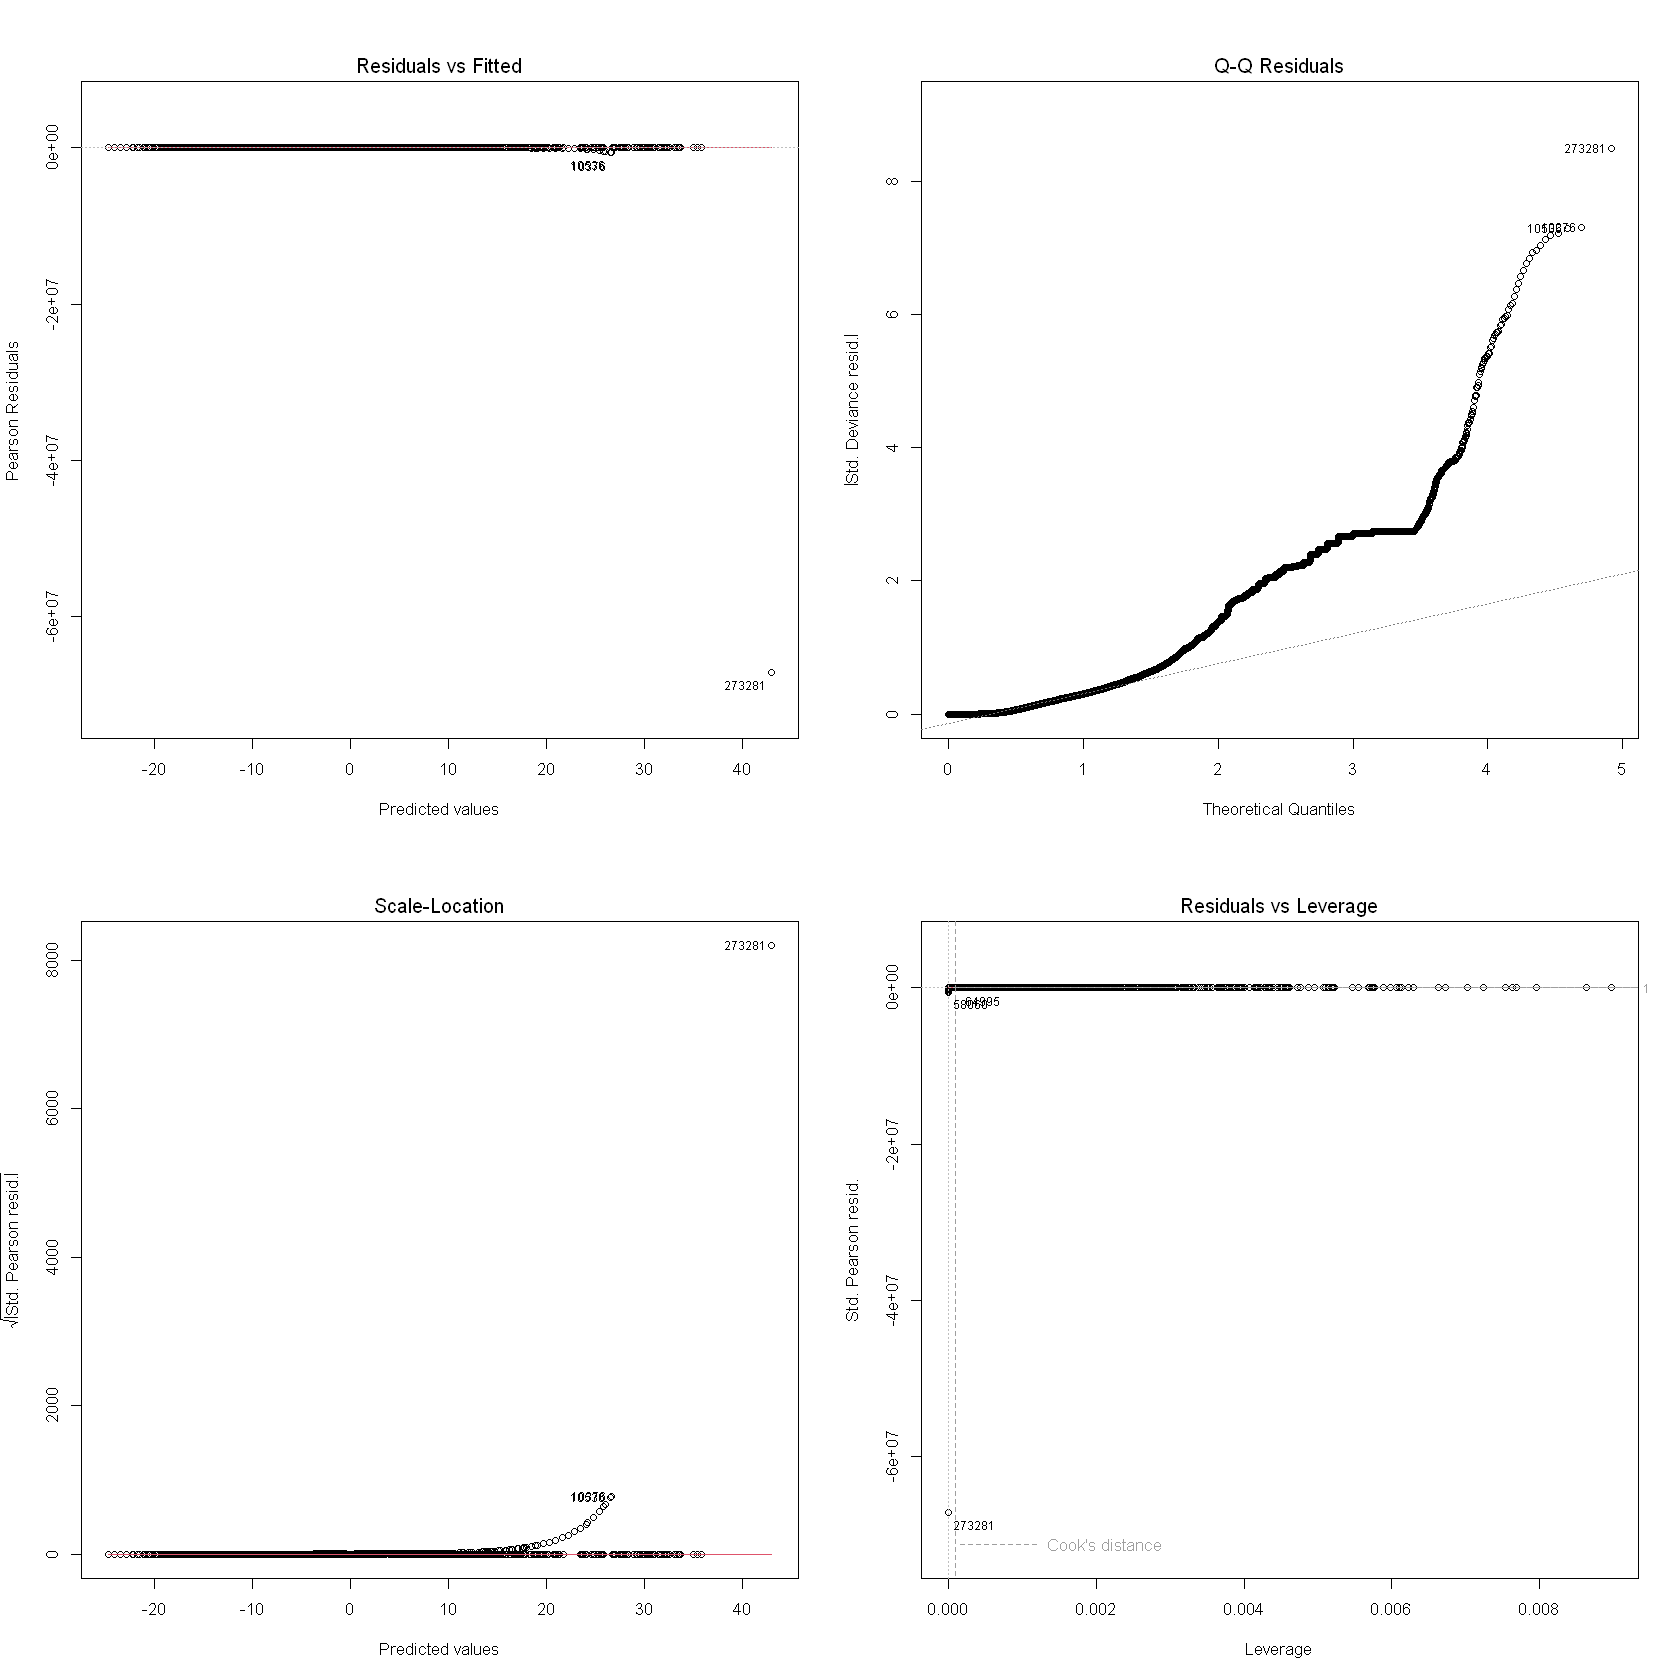

In [52]:
par(mfrow=c(2,2))
plot(model6)

In [53]:
actual <- up_fraud_data$Class
predicted <- round(fitted(model6))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

# Display confusion matrix data frame
conf_matrix_df

,0,1
,<int>,<int>
0,276083,7170
1,25179,258074


In [58]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 94.3%"


In [74]:
model7 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - V26, data=up_fraud_data, family = "binomial")
summary(model7)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - 
    V26, family = "binomial", data = up_fraud_data)

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.115386   0.009936 -313.533  < 2e-16 ***
V4           1.359080   0.006844  198.585  < 2e-16 ***
V5           0.176610   0.005176   34.122  < 2e-16 ***
V8          -0.362251   0.004869  -74.399  < 2e-16 ***
V10         -0.717639   0.008898  -80.654  < 2e-16 ***
V13         -0.329164   0.006169  -53.357  < 2e-16 ***
V14         -0.721703   0.005722 -126.134  < 2e-16 ***
V16         -0.241565   0.006133  -39.391  < 2e-16 ***
V20         -0.087883   0.005447  -16.135  < 2e-16 ***
V21          0.159640   0.005076   31.450  < 2e-16 ***
V22          0.253929   0.006566   38.675  < 2e-16 ***
V23         -0.160273   0.003181  -50.390  < 2e-16 ***
V27         -0.073129   0.005930  -12.332  < 2e-16 ***
V28         -0.017633   0.0059

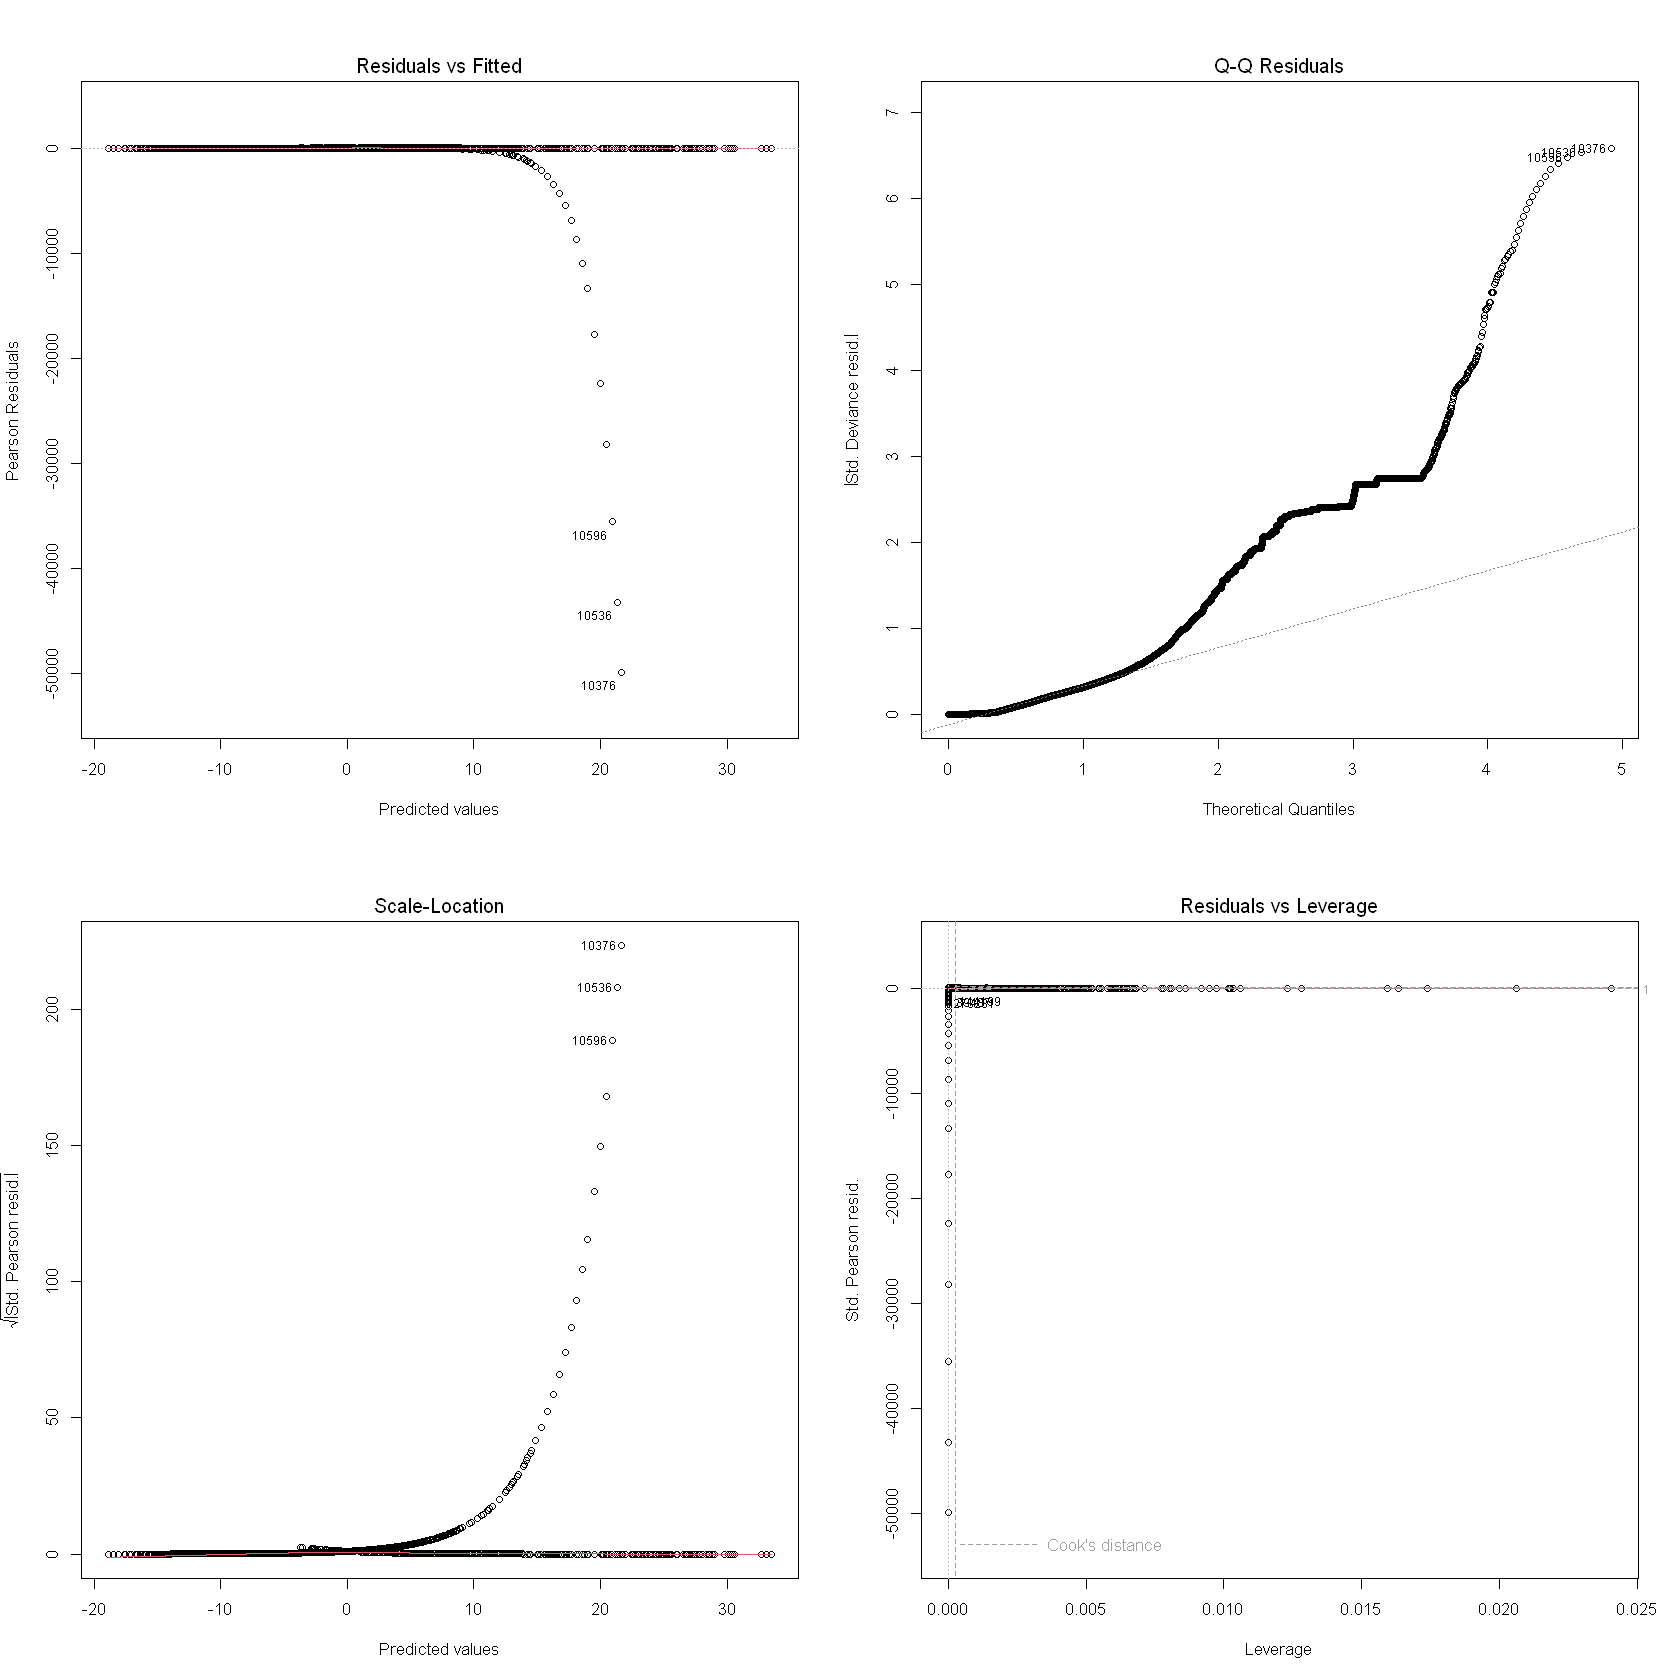

In [75]:
par(mfrow=c(2,2))
plot(model7)

In [78]:
actual <- up_fraud_data$Class
predicted <- round(fitted(model7))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

conf_matrix_df

,0,1
,<int>,<int>
0,275024,8229
1,25821,257432


In [80]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 94%"


DOWNSAMPLING

In [82]:
down_fraud_data <- downSample(x=fraud_data[,-ncol(fraud_data)], y=fraud_data$Class)
down_fraud_data$Class <- as.factor(down_fraud_data$Class)

In [83]:
summary(down_fraud_data$Class)

0   1 
473 473

In [85]:
model8 <- glm(Class ~ ., data=down_fraud_data, family=binomial)
summary(fit9)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -4.444e+01  6.763e+01  -0.657  0.51108   
Time        -2.193e-05  7.681e-06  -2.855  0.00431 **
V1          -7.053e+00  2.956e+01  -0.239  0.81142   
V2           1.409e+02  1.649e+02   0.854  0.39288   
V3          -8.971e+01  6.112e+01  -1.468  0.14215   
V4           5.948e+01  4.582e+01   1.298  0.19427   
V5          -2.583e+01  1.091e+01  -2.368  0.01788 * 
V6          -5.364e+01  6.067e+01  -0.884  0.37662   
V7          -1.878e+02  1.934e+02  -0.971  0.33152   
V8           3.275e+01  3.164e+01   1.035  0.30073   
V9          -5.991e+01  5.312e+01  -1.128  0.25938   
V10         -1.353e+02  1.200e+02  -1.127  0.25972   
V11          1.010e+02  9.600e+01   1.052  0.29277   
V12         -1.777e+02  1.684e+02  -1.055  0.29133   
V13         -2.802e+00  4.392e+00  -0.638  0.52344   
V14         -1.832e+02  1.758e+02  -1.042  0.2

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


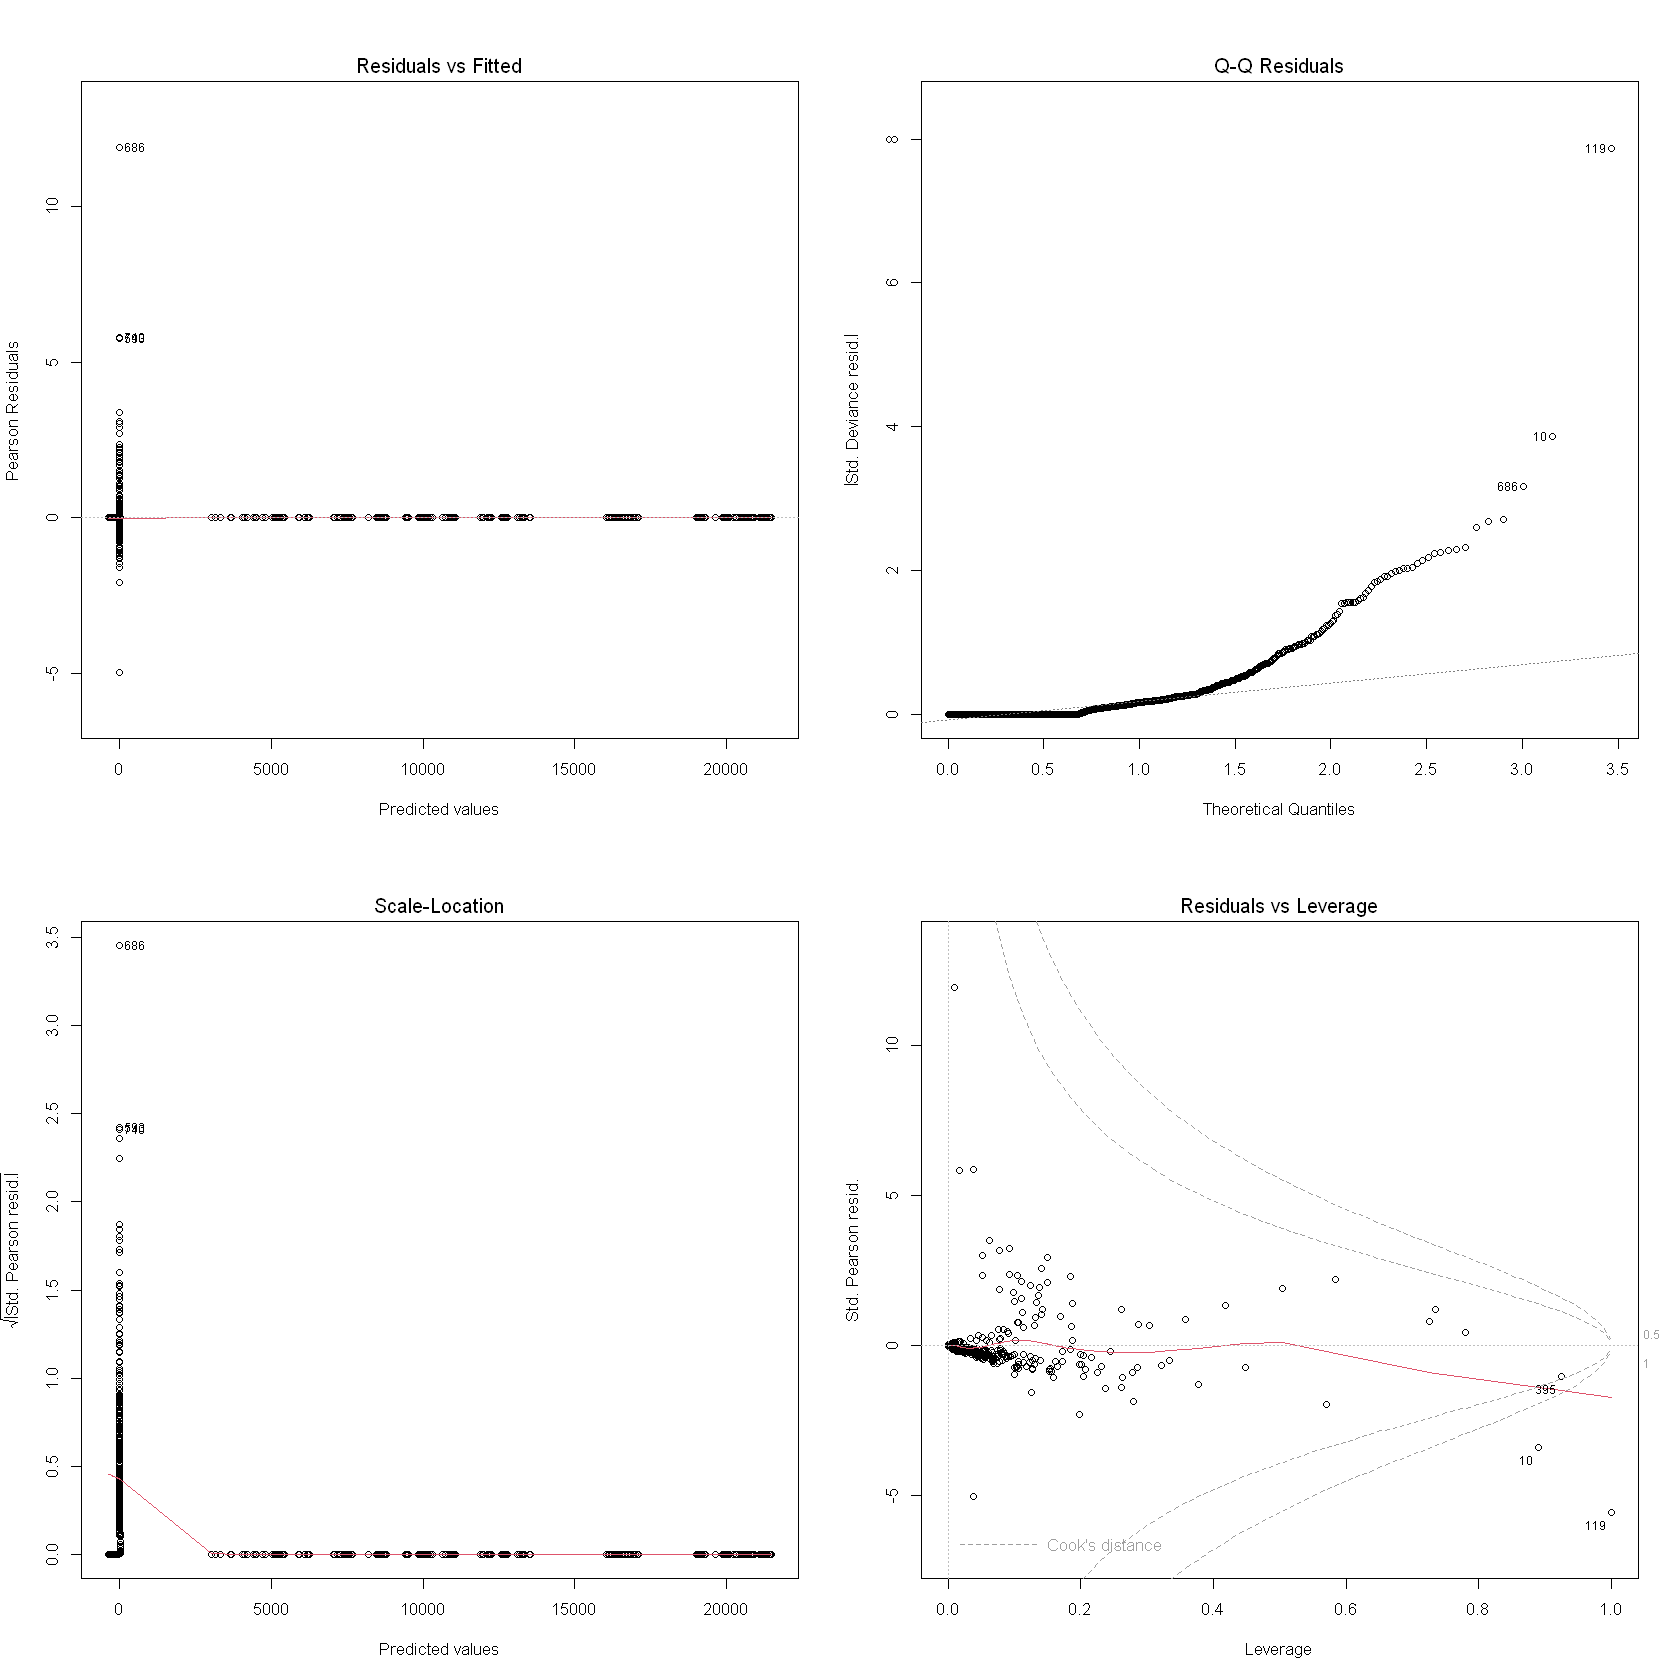

In [86]:
par(mfrow=c(2,2))
plot(model8)

In [87]:
actual <- down_fraud_data$Class
predicted <- round(fitted(model8))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

conf_matrix_df

,0,1
,<int>,<int>
0,464,9
1,30,443


In [88]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 95.9%"


In [89]:
model9 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data, family=binomial)
summary(model9)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.170e+00  4.865e-01  -6.516 7.22e-11 ***
Time        -8.717e-06  4.782e-06  -1.823  0.06831 .  
V1           2.458e-01  2.405e-01   1.022  0.30680    
V4           1.325e+00  2.211e-01   5.995 2.03e-09 ***
V5           2.697e-01  2.581e-01   1.045  0.29615    
V6          -8.174e-01  3.231e-01  -2.530  0.01140 *  
V7          -2.361e-01  2.342e-01  -1.008  0.31344    
V8          -7.359e-01  2.315e-01  -3.179  0.00148 ** 
V9          -5.131e-01  2.302e-01  -2.229  0.02583 *  
V10         -6.665e-01  2.495e-01  -2.671  0.00756 ** 
V11          9.180e-02  1.885e-01   0.487  0.62626    
V12         -4.873e-01  1.983e-01  -2.457  0.01401 *  
V13         -2.649e-01  1.727e-01  -1.533  0.12517    
V14         -9.651e-01  1.825e-01  -5.287 1.24e-07 ***
V15         -1.257e-01  1.967e-01  -0.639  0.5

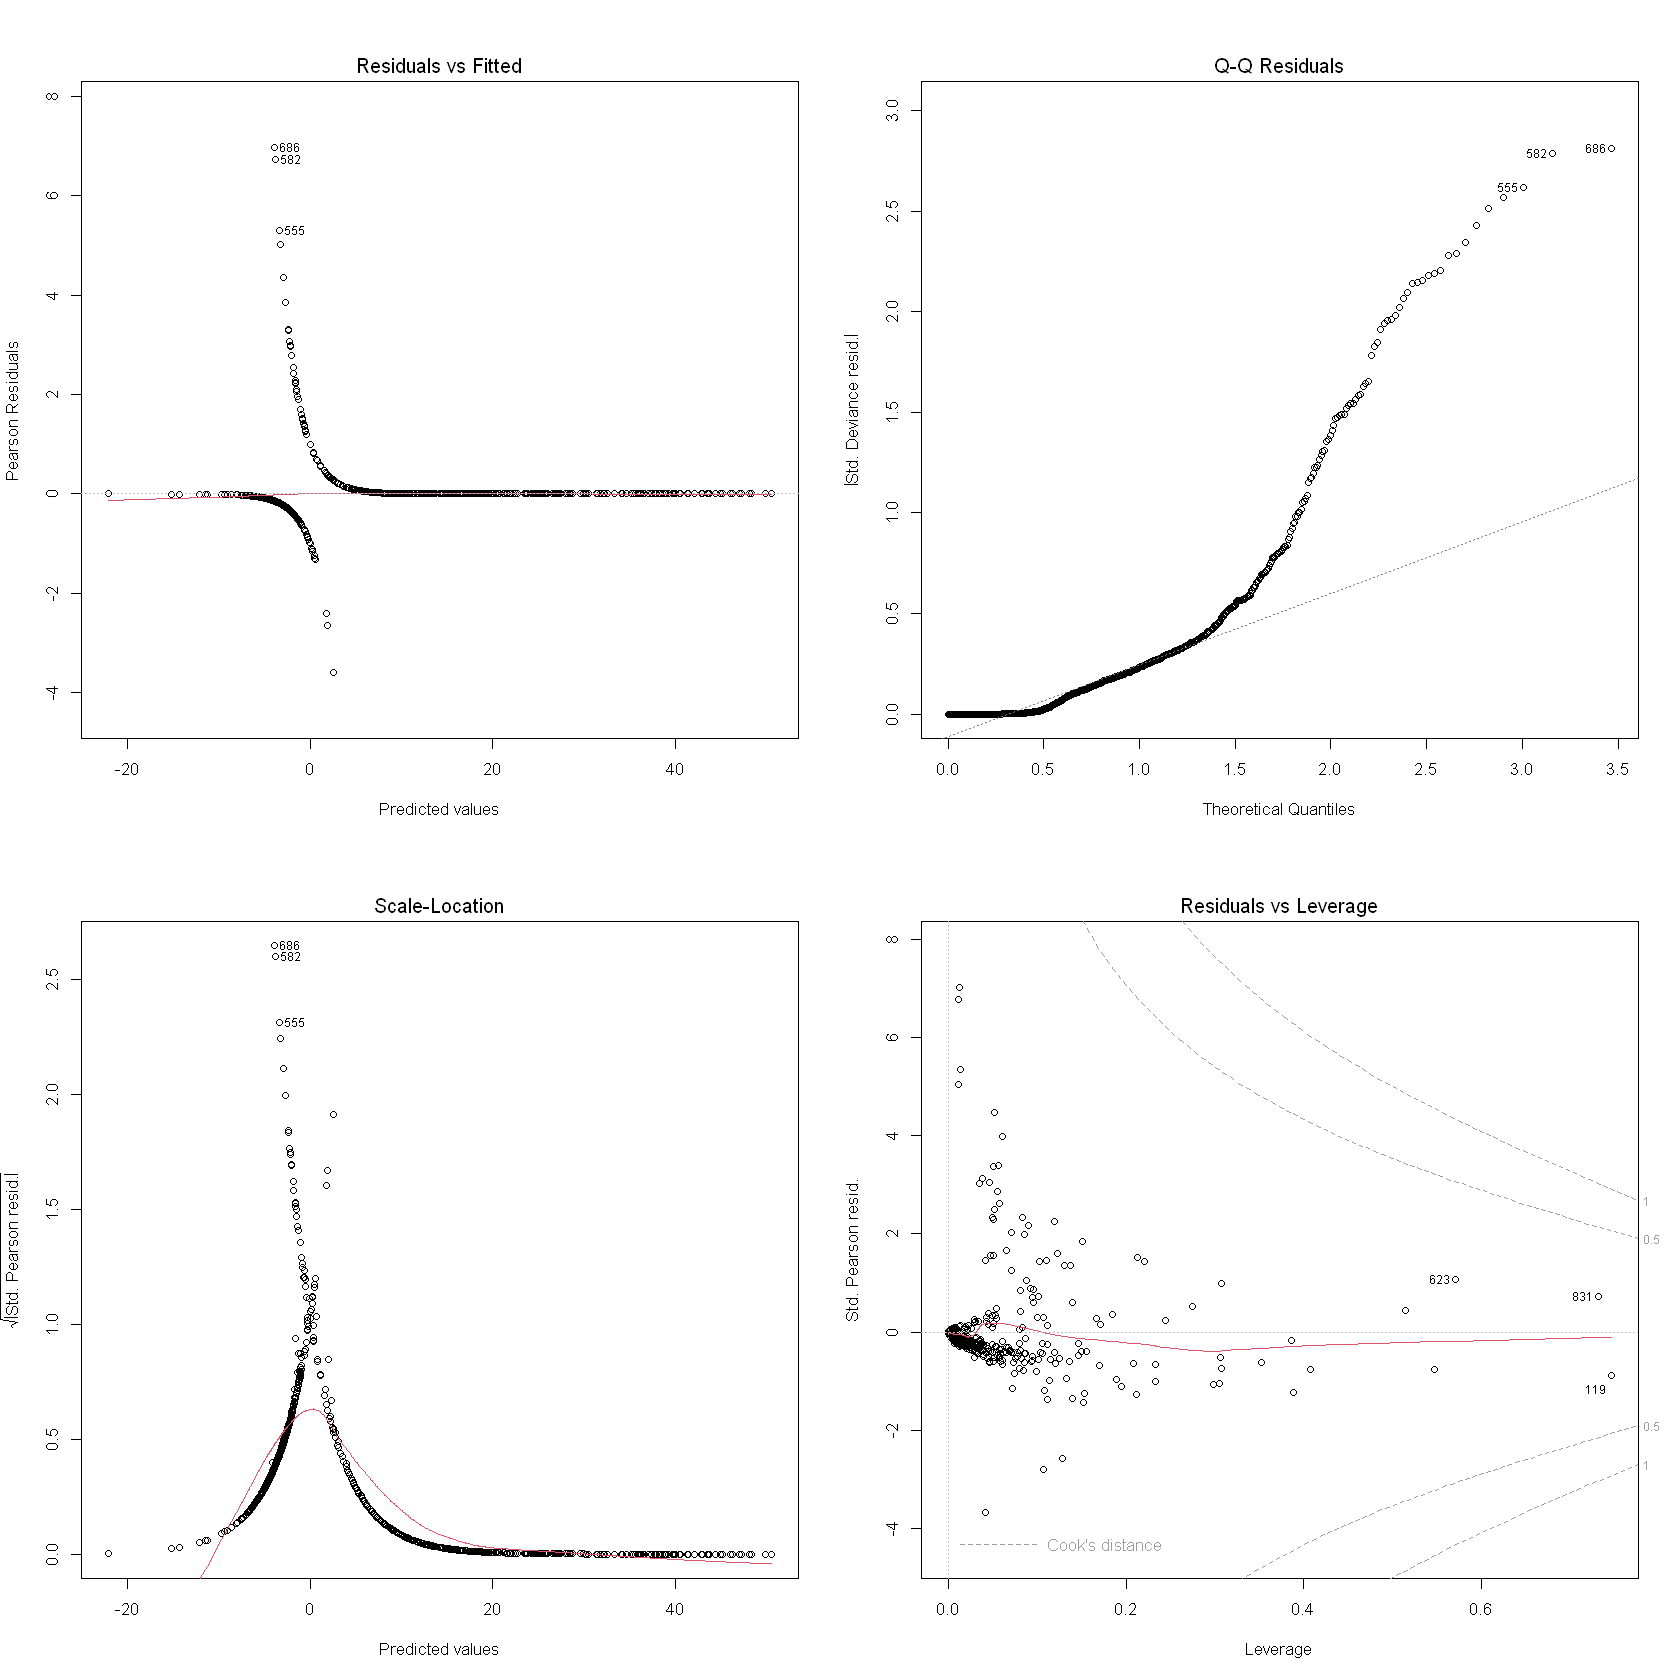

In [90]:
par(mfrow=c(2,2))
plot(model9)

In [91]:
actual <- down_fraud_data$Class
predicted <- round(fitted(model9))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

conf_matrix_df

,0,1
,<int>,<int>
0,463,10
1,36,437


In [92]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 95.1%"


In [93]:
model10 <- glm(Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V19 - V24, data=down_fraud_data, family = "binomial")
summary(model10)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - 
    V15 - V19 - V24, family = "binomial", data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.957e+00  4.294e-01  -6.886 5.76e-12 ***
Time        -9.010e-06  4.069e-06  -2.214 0.026810 *  
V1          -7.162e-02  1.764e-01  -0.406 0.684780    
V4           1.418e+00  2.056e-01   6.895 5.40e-12 ***
V5           4.895e-01  1.797e-01   2.724 0.006451 ** 
V8          -5.540e-01  1.518e-01  -3.649 0.000263 ***
V10         -8.010e-01  2.557e-01  -3.132 0.001735 ** 
V13         -2.661e-01  1.710e-01  -1.556 0.119689    
V14         -1.038e+00  1.940e-01  -5.352 8.69e-08 ***
V16         -1.834e-02  2.153e-01  -0.085 0.932123    
V17         -2.831e-01  1.775e-01  -1.595 0.110667    
V18          1.811e-02  2.168e-01   0.084 0.933429    
V20         -3.867e-01  2.249e-01  -1.719 0.085601 .  
V21          1.766e-01  1.691e-01   1.044 0.296291    
V22          2.791e-01 

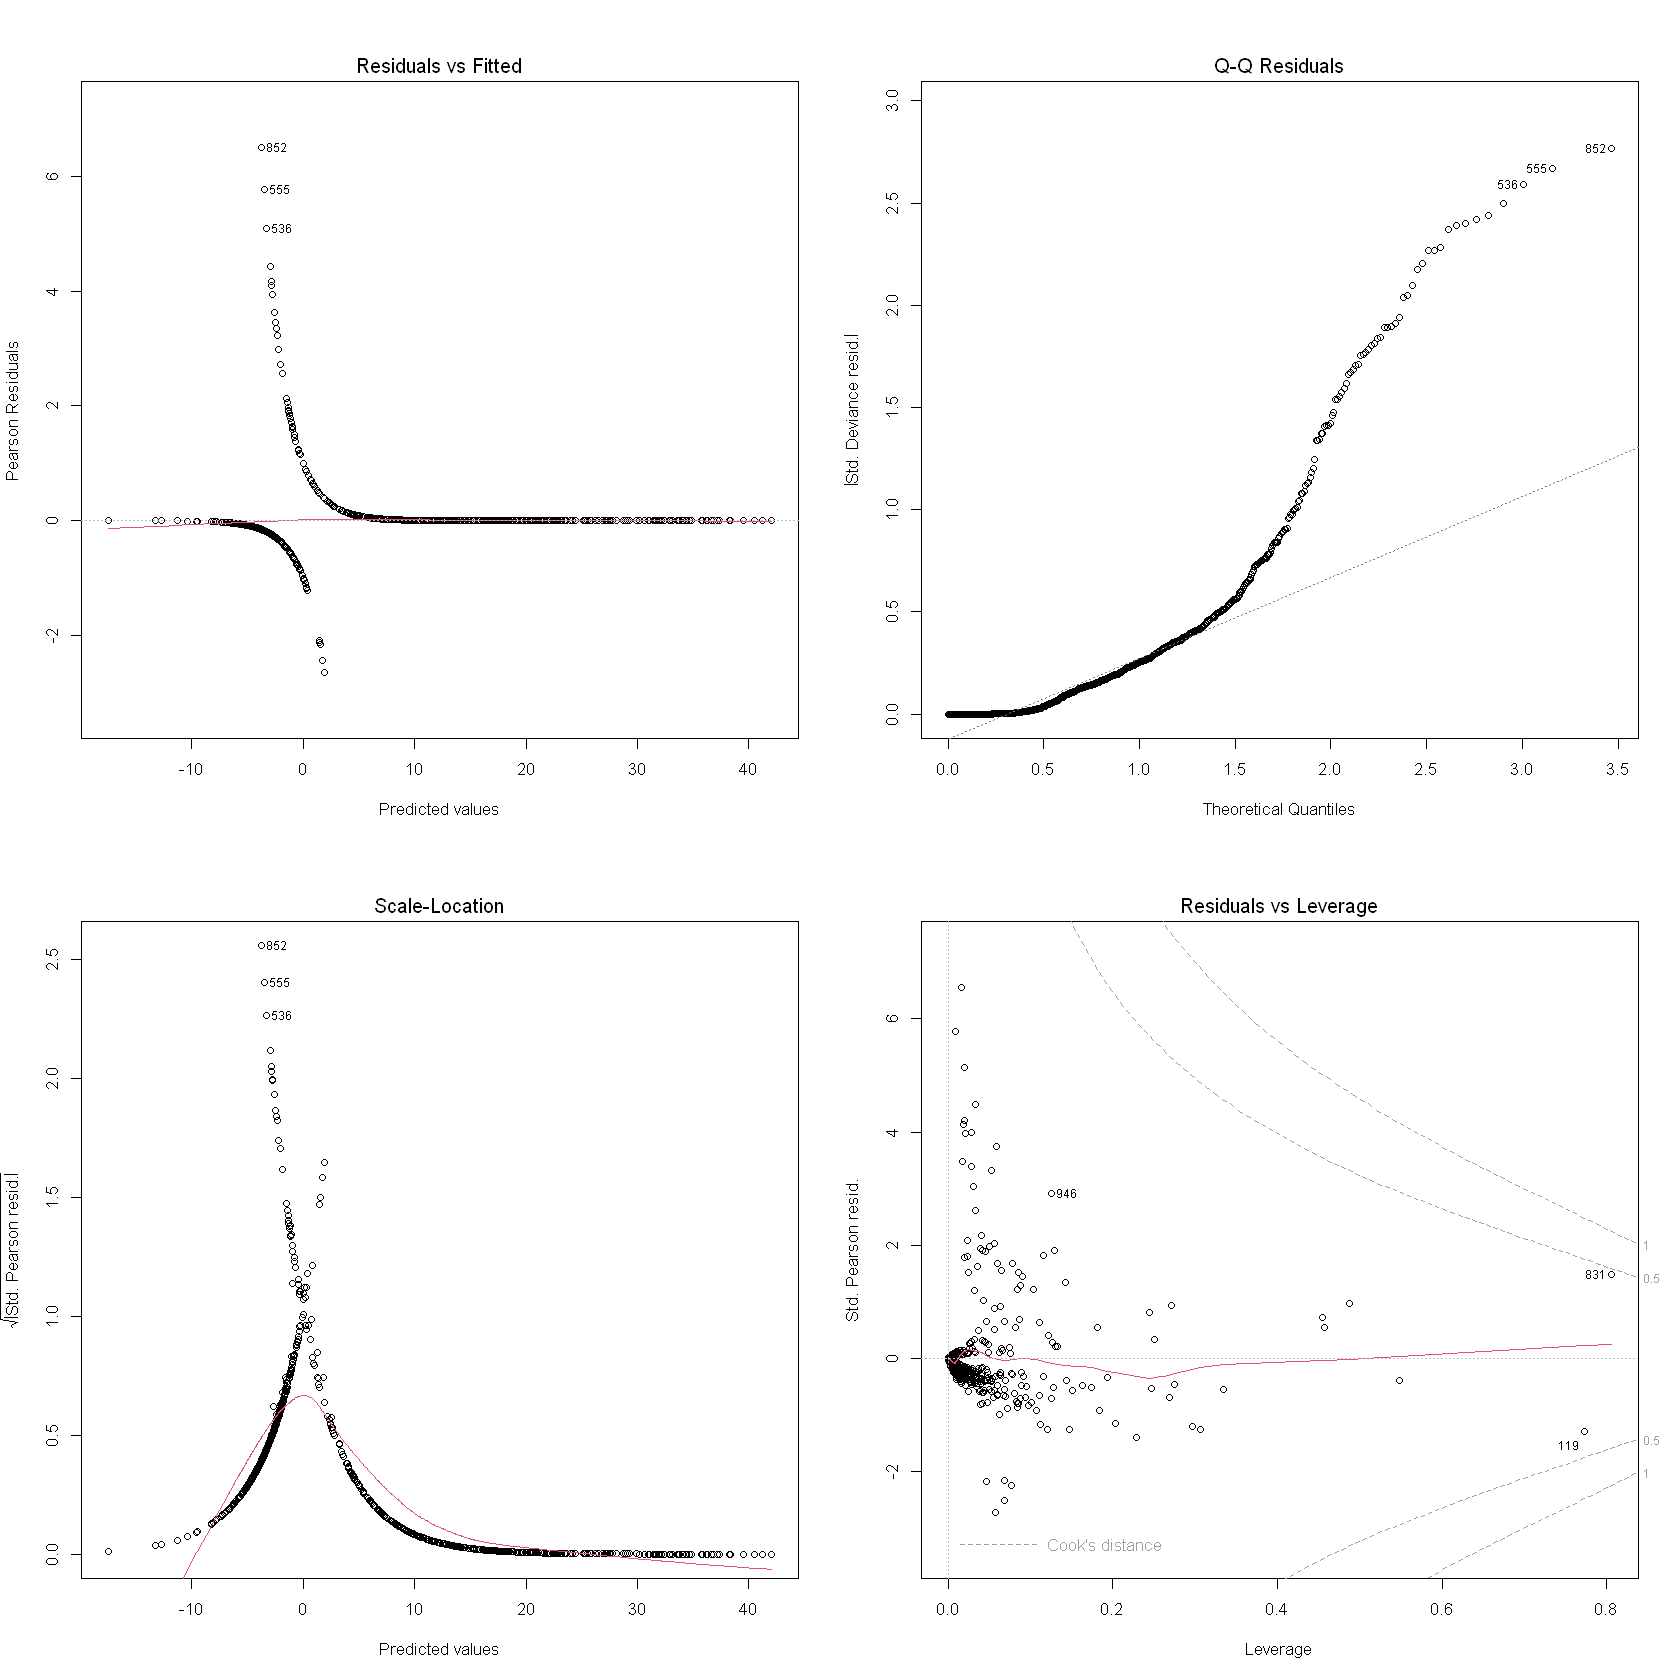

In [94]:
par(mfrow=c(2,2))
plot(model10)

In [95]:
actual <- down_fraud_data$Class
predicted <- round(fitted(model10))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

conf_matrix_df

,0,1
,<int>,<int>
0,461,12
1,38,435


In [96]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 94.7%"


In [98]:
model11 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - V26 , data=down_fraud_data, family = "binomial")
summary(model11)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - 
    V26, family = "binomial", data = down_fraud_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.21266    0.26037 -12.339  < 2e-16 ***
V4           1.47585    0.18190   8.114 4.91e-16 ***
V5           0.12819    0.15061   0.851   0.3947    
V8          -0.58291    0.11891  -4.902 9.48e-07 ***
V10         -0.90113    0.22165  -4.066 4.79e-05 ***
V13         -0.29216    0.15702  -1.861   0.0628 .  
V14         -0.76694    0.15065  -5.091 3.56e-07 ***
V16         -0.14876    0.16184  -0.919   0.3580    
V20         -0.10788    0.18510  -0.583   0.5600    
V21          0.31094    0.12752   2.438   0.0148 *  
V22          0.19966    0.15939   1.253   0.2103    
V23         -0.18060    0.08544  -2.114   0.0345 *  
V27          0.10678    0.17873   0.597   0.5502    
V28          0.03168    0.23435   0.135   0.8925    
---

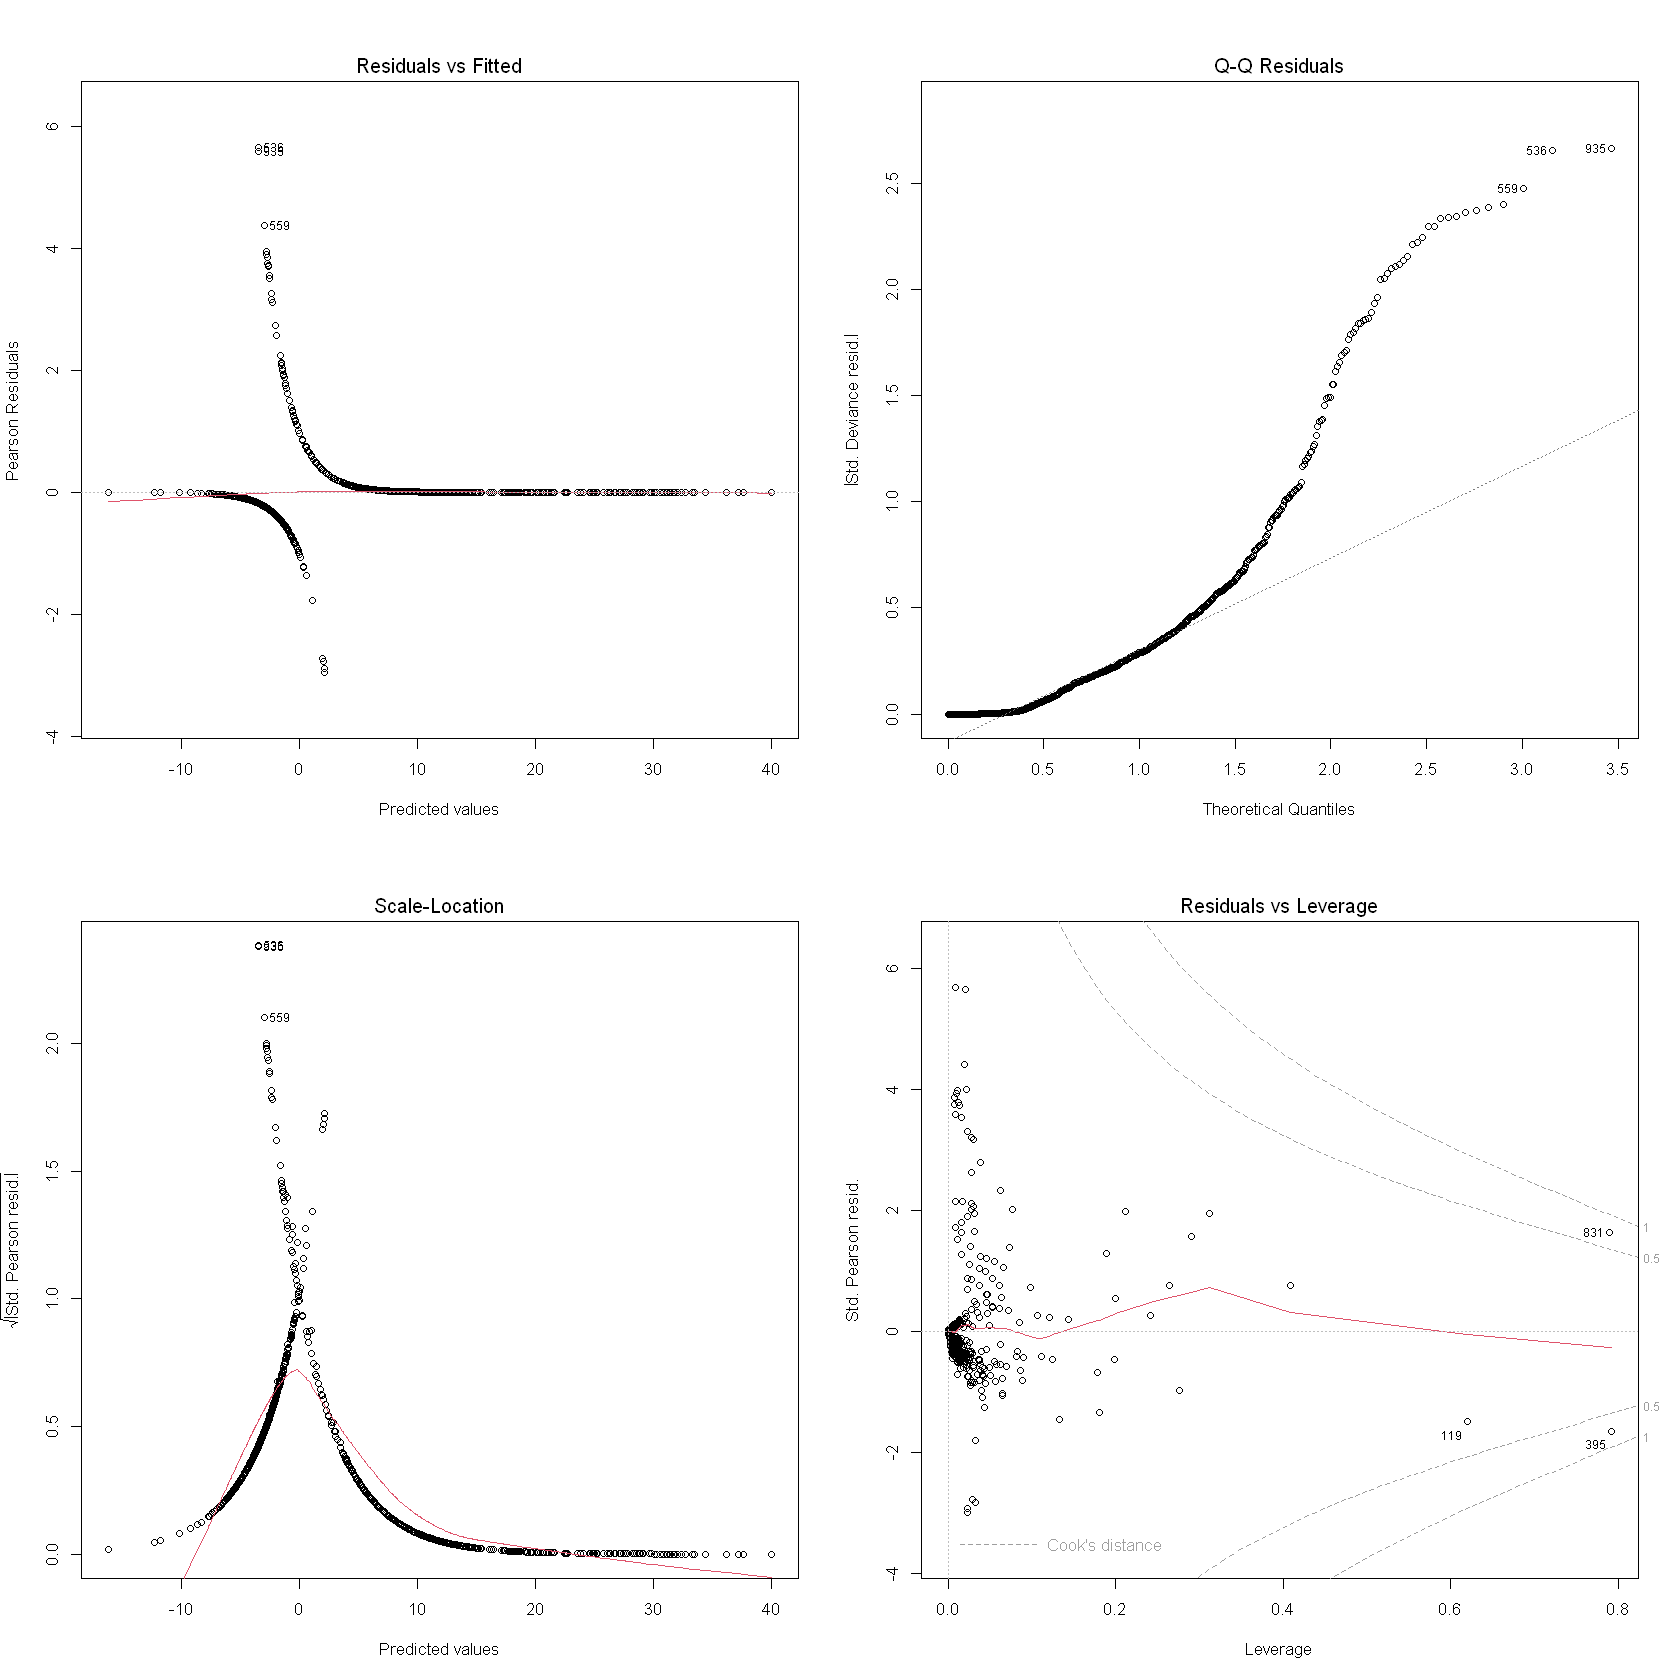

In [99]:
par(mfrow=c(2,2))
plot(model11)

In [101]:
actual <- down_fraud_data$Class
predicted <- round(fitted(model11))

conf_matrix <- table(actual, predicted)

conf_matrix_df <- as.data.frame.matrix(conf_matrix)

conf_matrix_df

,0,1
,<int>,<int>
0,463,10
1,44,429


In [102]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

rounded_accuracy <- round(accuracy, 3)

accuracy_percentage <- paste0(rounded_accuracy * 100, "%")

accuracy_message <- paste("The accuracy of the model is:", accuracy_percentage)

print(accuracy_message)

[1] "The accuracy of the model is: 94.3%"


## Hosmer-Lemeshow test

In [103]:
hoslem.test(fraud_data$Class, fitted(model1))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(model1)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [104]:
hoslem.test(fraud_data$Class, fitted(model2))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(model2)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [105]:
hoslem.test(fraud_data$Class, fitted(model3))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(model3)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [118]:
hoslem.test(up_fraud_data$Class, fitted(model4))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"
Warning message in hoslem.test(up_fraud_data$Class, fitted(model4)):
"The data did not allow for the requested number of bins."



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(model4)
X-squared = 566506, df = 6, p-value < 2.2e-16


In [107]:
hoslem.test(up_fraud_data$Class, fitted(model5))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(model5)
X-squared = 566506, df = 8, p-value < 2.2e-16


In [108]:
hoslem.test(up_fraud_data$Class, fitted(model6))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(model6)
X-squared = 566506, df = 8, p-value < 2.2e-16


In [109]:
hoslem.test(up_fraud_data$Class, fitted(model7))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(model7)
X-squared = 566506, df = 8, p-value < 2.2e-16


In [119]:
hoslem.test(down_fraud_data$Class, fitted(model8))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"
Warning message in hoslem.test(down_fraud_data$Class, fitted(model8)):
"The data did not allow for the requested number of bins."



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(model8)
X-squared = 946, df = 5, p-value < 2.2e-16


In [111]:
hoslem.test(down_fraud_data$Class, fitted(model9))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(model9)
X-squared = 946, df = 8, p-value < 2.2e-16


In [112]:
hoslem.test(down_fraud_data$Class, fitted(model10))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(model10)
X-squared = 946, df = 8, p-value < 2.2e-16


In [113]:
hoslem.test(down_fraud_data$Class, fitted(model11))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(model11)
X-squared = 946, df = 8, p-value < 2.2e-16


## ODD'S RATIO

An odds ratio greater than 1 suggests that the odds of the outcome increase as the predictor variable increases.<br>
An odds ratio equal to 1 suggests that there is no association between the predictor variable and the outcome.<br>
An odds ratio less than 1 suggests that the odds of the outcome decrease as the predictor variable increases.<br>

In [120]:
coefficients <- coef(model1)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V2          V3          V4 
 0.00022524  0.99999632  1.20594791  1.01762827  0.98749720  2.69614553 
         V5          V6          V7          V8          V9         V10 
 1.19687428  0.84779383  0.89013284  0.81203357  0.73379776  0.41232791 
        V11         V12         V13         V14         V15         V16 
 0.94271909  1.08619311  0.72310103  0.59361997  0.89544872  0.84029826 
        V17         V18         V19         V20         V21         V22 
 0.98836402  0.98846281  1.08345458  0.70086361  1.33048558  1.58728300 
        V23         V24         V25         V26         V27         V28 
 0.93832189  1.07482267  0.97399073  1.00456202  0.72103394  0.90708960 
     Amount 
 1.00092313 


In [121]:
coefficients <- coef(model2)
odds_ratios <- exp(coefficients)
print(odds_ratios)

 (Intercept)         Time           V1           V4           V5           V8 
0.0002176444 0.9999965816 1.0487555487 2.7578669729 1.1298033832 0.8343621462 
          V9          V10          V13          V14          V20          V21 
0.8468119949 0.3777220749 0.7182016012 0.6110188394 0.8165390094 1.4632009132 
         V22          V23          V27          V28       Amount 
1.8718669987 0.9054352430 0.7489451731 0.9191097336 1.0000540281 


In [122]:
coefficients <- coef(model3)
odds_ratios <- exp(coefficients)
print(odds_ratios)

 (Intercept)         Time           V4           V5           V8          V10 
0.0002033266 0.9999971137 2.7791674526 1.1417211881 0.8345714057 0.3842517848 
         V13          V14          V20          V21          V22          V23 
0.7118461521 0.5922230068 0.8455006673 1.4498872807 1.8982251326 0.9158317078 
         V27          V28 
0.7872436190 0.9269015816 


In [123]:
coefficients <- coef(model4)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V2          V3          V4 
  0.0319037   0.9999919   3.7388364   2.6664938   1.5205487   2.8937448 
         V5          V6          V7          V8          V9         V10 
  2.8707859   0.4871161   0.4944053   0.6110725   0.7080099   0.4661673 
        V11         V12         V13         V14         V15         V16 
  1.6401790   0.3546662   0.6929998   0.2615593   0.8598155   0.5338691 
        V17         V18         V19         V20         V21         V22 
  0.4780027   0.8010311   1.3005674   0.5274480   1.0311416   1.7695407 
        V23         V24         V25         V26         V27         V28 
  1.3309744   0.9848349   1.0120804   0.8413283   1.0222223   1.2888879 
     Amount 
  1.0084973 


In [124]:
coefficients <- coef(model5)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V6 
 0.05549181  0.99999432  1.37809200  3.09231926  1.26291297  0.64636976 
         V7          V8          V9         V10         V11         V12 
 0.97795772  0.66086382  0.75408093  0.58179412  1.32130311  0.52375109 
        V13         V14         V15         V16         V19         V20 
 0.73086019  0.44272704  0.87300309  0.70921988  1.03285630  0.78498855 
        V21         V22         V23         V24         V27         V28 
 1.12684110  1.52846910  0.93400521  0.98400145  1.01787757  1.04613574 
     Amount 
 1.00203038 


In [125]:
coefficients <- coef(model6)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V8 
 0.06537659  0.99999320  1.16735802  3.98147759  1.42976161  0.73985102 
        V10         V13         V14         V16         V17         V18 
 0.44882496  0.72327442  0.45128691  0.76305626  0.83177033  1.08303317 
        V20         V21         V22         V23         V25         V26 
 0.77063688  1.14736920  1.36735323  0.88535363  0.93008361  0.88519426 
        V27      Amount 
 0.95381236  1.00144296 


In [126]:
coefficients <- coef(model7)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)          V4          V5          V8         V10         V13 
 0.04436137  3.89260923  1.19316522  0.69610788  0.48790285  0.71952490 
        V14         V16         V20         V21         V22         V23 
 0.48592382  0.78539768  0.91586775  1.17308824  1.28907965  0.85191132 
        V27         V28 
 0.92948126  0.98252178 


In [127]:
coefficients <- coef(model8)
odds_ratios <- exp(coefficients)
print(odds_ratios)

  (Intercept)          Time            V1            V2            V3 
 5.008342e-20  9.999781e-01  8.643947e-04  1.498052e+61  1.093185e-39 
           V4            V5            V6            V7            V8 
 6.806842e+25  6.039843e-12  5.080039e-24  2.813406e-82  1.668939e+14 
           V9           V10           V11           V12           V13 
 9.567921e-27  1.811694e-59  7.326792e+43  6.931126e-78  6.068321e-02 
          V14           V15           V16           V17           V18 
 2.680099e-80  3.288715e-03  2.502567e-65 2.323424e-111  2.375104e-42 
          V19           V20           V21           V22           V23 
 6.024989e+15  6.720969e-06  1.502667e+04  8.692520e+04  2.814659e+11 
          V24           V25           V26           V27           V28 
 5.458373e-02  7.162375e+04  1.099076e+01  2.156858e+04  1.351571e+08 
       Amount 
 1.653413e+00 


In [128]:
coefficients <- coef(model9)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V6 
 0.04199795  0.99999128  1.27867095  3.76383911  1.30956181  0.44156381 
         V7          V8          V9         V10         V11         V12 
 0.78970302  0.47905935  0.59865552  0.51348879  1.09614548  0.61427845 
        V13         V14         V15         V16         V19         V20 
 0.76730677  0.38094117  0.88189257  0.90088603  1.13043821  0.63086564 
        V21         V22         V23         V24         V27         V28 
 1.12793138  1.48032605  0.95609389  0.88727366  1.01873997  1.25146302 
     Amount 
 1.00576413 


In [129]:
coefficients <- coef(model10)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V8 
 0.05199731  0.99999099  0.93088318  4.12796909  1.63156680  0.57462311 
        V10         V13         V14         V16         V17         V18 
 0.44886175  0.76638066  0.35411771  0.98182901  0.75344471  1.01827829 
        V20         V21         V22         V23         V25         V26 
 0.67931927  1.19317151  1.32189957  0.84080281  1.10298702  1.04465225 
        V27         V28      Amount 
 1.06097788  1.41595836  1.00488007 


In [130]:
coefficients <- coef(model11)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)          V4          V5          V8         V10         V13 
 0.04024945  4.37474772  1.13677456  0.55827226  0.40610950  0.74664724 
        V14         V16         V20         V21         V22         V23 
 0.46443328  0.86177373  0.89773554  1.36471206  1.22099190  0.83477298 
        V27         V28 
 1.11268558  1.03218912 


SELECTING THE BEST MODEL BASED ON AIC

In [135]:
model_list <- list(model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11)

# Function to extract AIC from each model
extract_AIC <- function(model) {
  AIC_val <- AIC(model)
  return(AIC_val)
}

# Extract AIC values for each model
AIC_values <- sapply(model_list, extract_AIC)

# Print model names and corresponding AIC values
for (i in seq_along(model_list)) {
  cat(paste("Model:", paste("model", i, sep = ""), "- AIC:", AIC_values[i], "\n"))
}

Model: model1 - AIC: 2287.60691859998 
Model: model2 - AIC: 2293.66477713137 
Model: model3 - AIC: 2292.38442306582 
Model: model4 - AIC: 156392.612880961 
Model: model5 - AIC: 161954.815586184 
Model: model6 - AIC: 174810.561196249 
Model: model7 - AIC: 180911.327269927 
Model: model8 - AIC: 252.550321100364 
Model: model9 - AIC: 281.896322441313 
Model: model10 - AIC: 292.817957512869 
Model: model11 - AIC: 311.672286921653 


IMPROVING OVER FIT10 AS IT HAS THE LOWEST AIC

In [170]:
diagnostics_model9 <- data.frame(Model = "model9", 
                                 Cooks_Distance = NA,
                                 Leverage = NA,
                                 Std_Residuals = NA,
                                 DFBeta = NA)

final_model9 <- model9

# Cook's distance
cooks_dist_model9 <- cooks.distance(final_model9)
diagnostics_model9$Cooks_Distance <- max(cooks_dist_model9)

# Leverage
leverage_model9 <- hatvalues(final_model9)
diagnostics_model9$Leverage <- max(leverage_model9)

# Standardized residuals
std_res_model9 <- rstandard(final_model9)
diagnostics_model9$Std_Residuals <- max(abs(std_res_model9))

# DFBeta
df_beta_model9 <- dfbetas(final_model9)
diagnostics_model9$DFBeta <- max(apply(abs(df_beta_model9), 1, max))

diagnostics_model9

Model,Cooks_Distance,Leverage,Std_Residuals,DFBeta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model9,0.09191709,0.7459437,2.811433,2.234703


In [141]:
down_fraud_data_1 <- down_fraud_data[-c(163, 399, 867),]

In [142]:
model9_improved <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data_1, family=binomial)
summary(model9_improved)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = down_fraud_data_1)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.176e+00  4.869e-01  -6.524 6.86e-11 ***
Time        -8.592e-06  4.787e-06  -1.795  0.07267 .  
V1           2.493e-01  2.407e-01   1.036  0.30031    
V4           1.325e+00  2.209e-01   6.000 1.98e-09 ***
V5           2.696e-01  2.579e-01   1.045  0.29580    
V6          -8.184e-01  3.225e-01  -2.538  0.01116 *  
V7          -2.376e-01  2.343e-01  -1.014  0.31043    
V8          -7.346e-01  2.312e-01  -3.177  0.00149 ** 
V9          -5.099e-01  2.301e-01  -2.216  0.02672 *  
V10         -6.662e-01  2.497e-01  -2.668  0.00762 ** 
V11          9.131e-02  1.884e-01   0.485  0.62798    
V12         -4.886e-01  1.983e-01  -2.464  0.01374 *  
V13         -2.680e-01  1.731e-01  -1.548  0.12161    
V14         -9.629e-01  1.824e-01  -5.280 1.29e-07 ***
V15         -1.245e-01  1.964e-01  -0.634  0

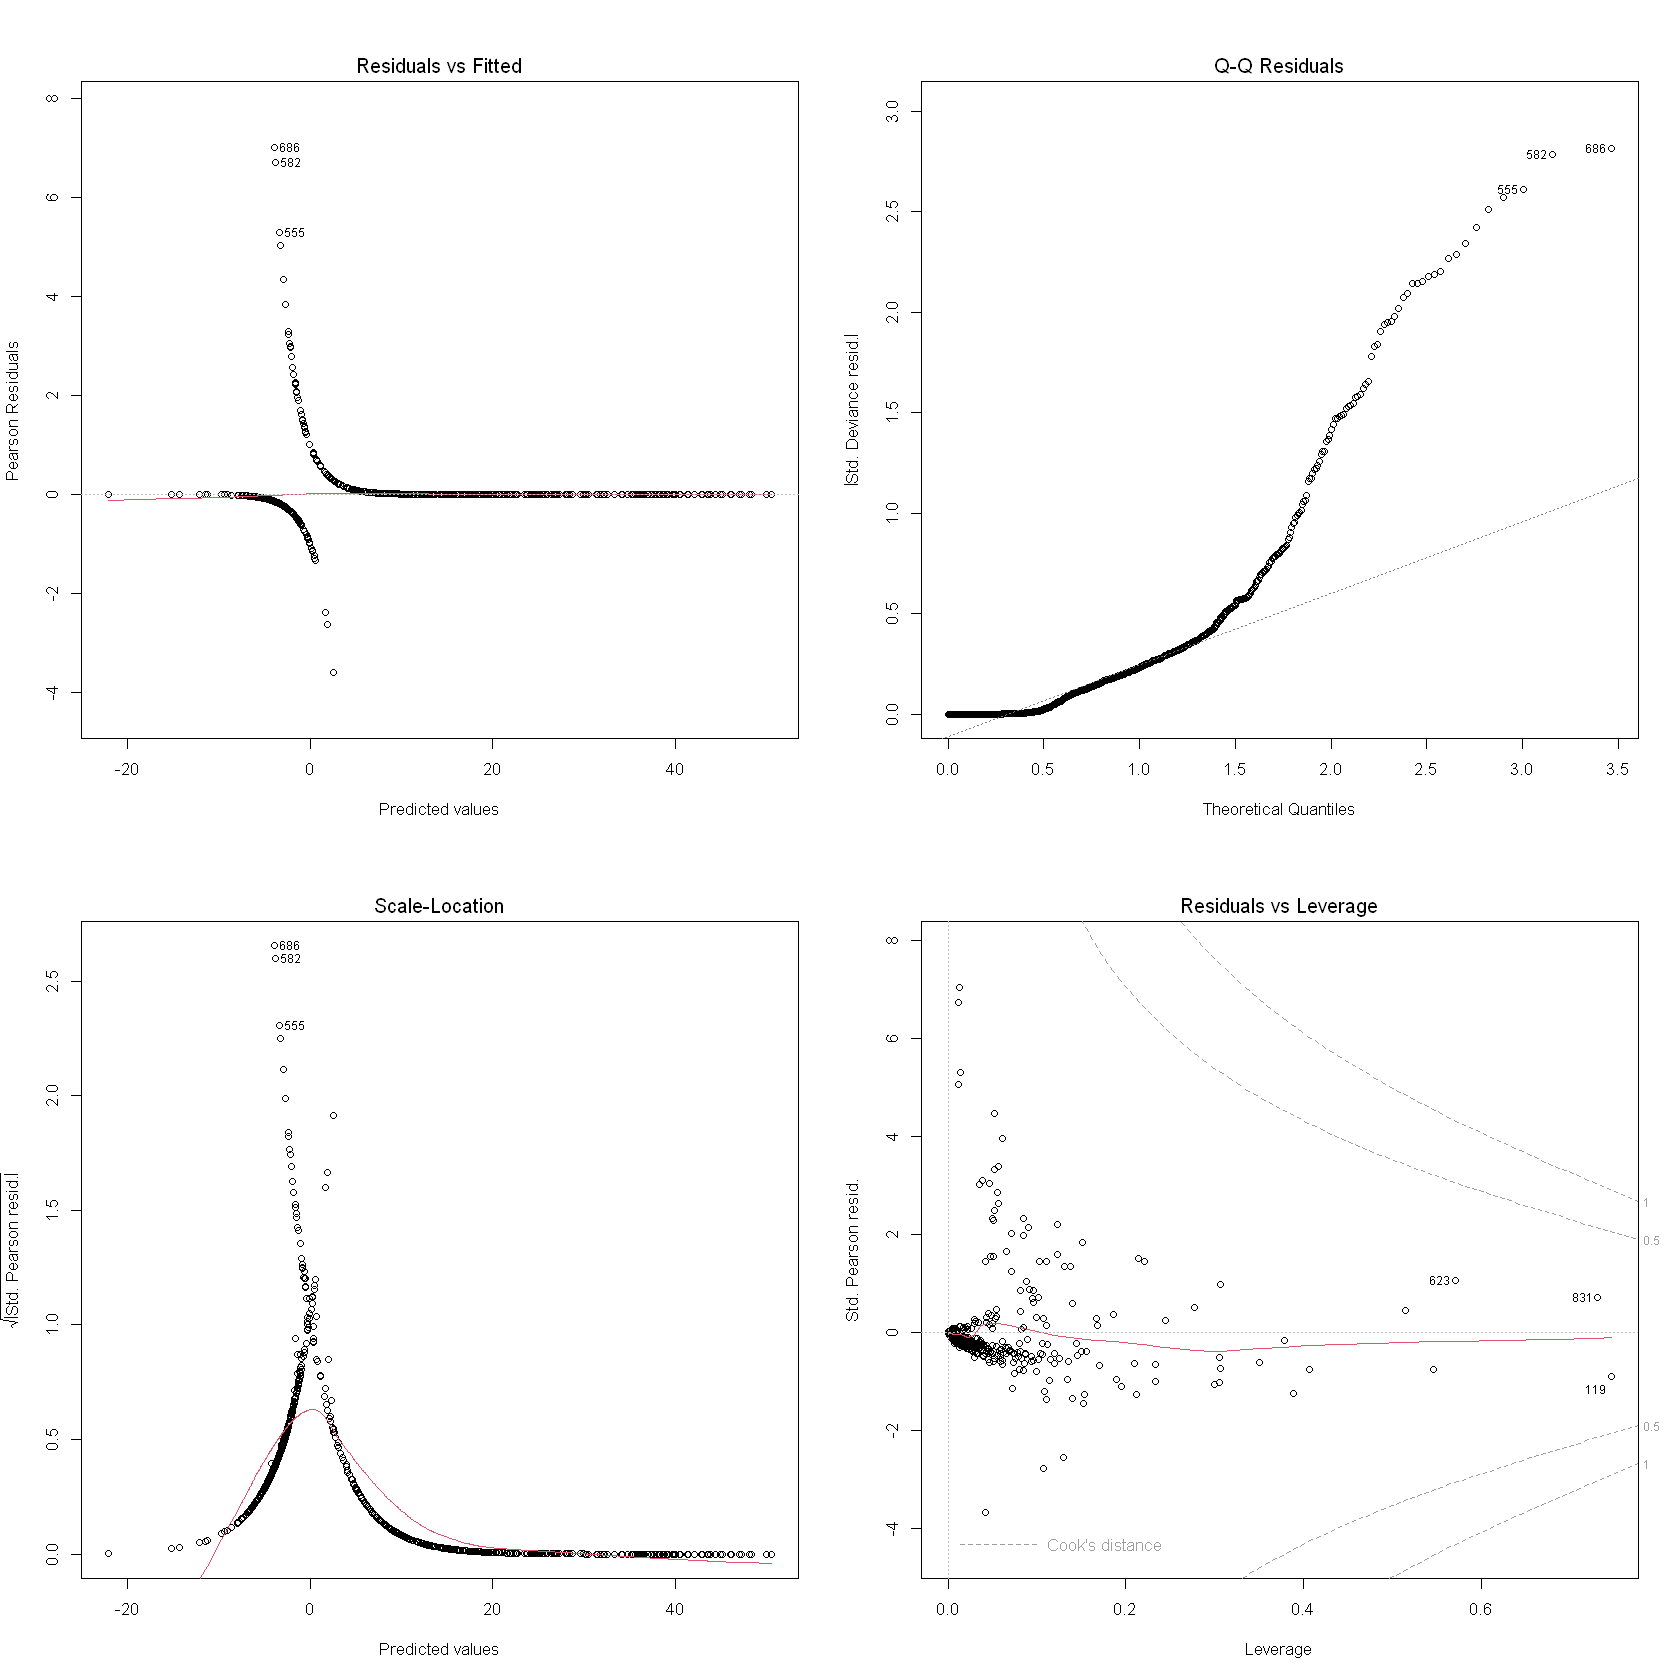

In [143]:
par(mfrow=c(2,2))
plot(model9_improved)

In [144]:
actual <- down_fraud_data_1$Class
predicted <- round(fitted(model9_improved))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 461  10
     1  36 436

In [145]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.951

In [169]:
diagnostics_fit10_1 <- data.frame(Model = "model9_improved", 
                                 Cooks_Distance = NA,
                                 Leverage = NA,
                                 Std_Residuals = NA,
                                 DFBeta = NA)

model_fit10_1 <- model9_improved

# Cook's distance
cooks_dist_fit10_1 <- cooks.distance(model_fit10_1)
diagnostics_fit10_1$Cooks_Distance <- max(cooks_dist_fit10_1)

# Leverage
leverage_fit10_1 <- hatvalues(model_fit10_1)
diagnostics_fit10_1$Leverage <- max(leverage_fit10_1)

# Standardized residuals
std_res_fit10_1 <- rstandard(model_fit10_1)
diagnostics_fit10_1$Std_Residuals <- max(abs(std_res_fit10_1))

# DFBeta
df_beta_fit10_1 <- dfbetas(model_fit10_1)
diagnostics_fit10_1$DFBeta <- max(apply(abs(df_beta_fit10_1), 1, max))

diagnostics_fit10_1

Model,Cooks_Distance,Leverage,Std_Residuals,DFBeta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model9_improved,0.09307973,0.7467254,2.814797,2.244682


## Coefficients fit10_1

In [148]:
print(round(coef(model9_improved),4))

(Intercept)        Time          V1          V4          V5          V6 
    -3.1763      0.0000      0.2493      1.3254      0.2696     -0.8184 
         V7          V8          V9         V10         V11         V12 
    -0.2376     -0.7346     -0.5099     -0.6662      0.0913     -0.4886 
        V13         V14         V15         V16         V19         V20 
    -0.2680     -0.9629     -0.1245     -0.1103      0.1202     -0.4610 
        V21         V22         V23         V24         V27         V28 
     0.1187      0.3936     -0.0431     -0.1153      0.0196      0.2235 
     Amount 
     0.0057 


In [149]:
confint(model9_improved)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,2.5 %,97.5 %
(Intercept),-4.188921e+00,-2.272786e+00
Time,-1.824872e-05,6.002670e-07
V1,-2.109231e-01,7.498061e-01
V4,9.243403e-01,1.793199e+00
V5,-2.344956e-01,7.475356e-01
V6,-1.494281e+00,-2.493876e-01
V7,-7.033425e-01,2.170406e-01
V8,-1.193857e+00,-3.268672e-01
V9,-9.856697e-01,-7.118733e-02
V10,-1.228768e+00,-2.122905e-01


In [150]:
cbind(coef(model9_improved), confint(model9_improved, level=0.99))

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,,0.5 %,99.5 %
(Intercept),-3.176339e+00,-4.533317e+00,-2.007837e+00
Time,-8.591754e-06,-2.141783e-05,3.436667e-06
V1,2.492760e-01,-3.570592e-01,9.236472e-01
V4,1.325425e+00,8.103134e-01,1.955104e+00
V5,2.696030e-01,-3.954181e-01,8.864428e-01
V6,-8.184200e-01,-1.721119e+00,-9.905906e-02
V7,-2.376351e-01,-8.551115e-01,3.594940e-01
V8,-7.345857e-01,-1.341399e+00,-2.055433e-01
V9,-5.098870e-01,-1.148556e+00,6.413184e-02
V10,-6.662223e-01,-1.435712e+00,-7.534374e-02


## Linear Regression 

In [155]:
down_fraud_data_1$Class <- as.numeric(down_fraud_data_1$Class)

In [159]:
correlation_matrix <- cor(down_fraud_data_1)

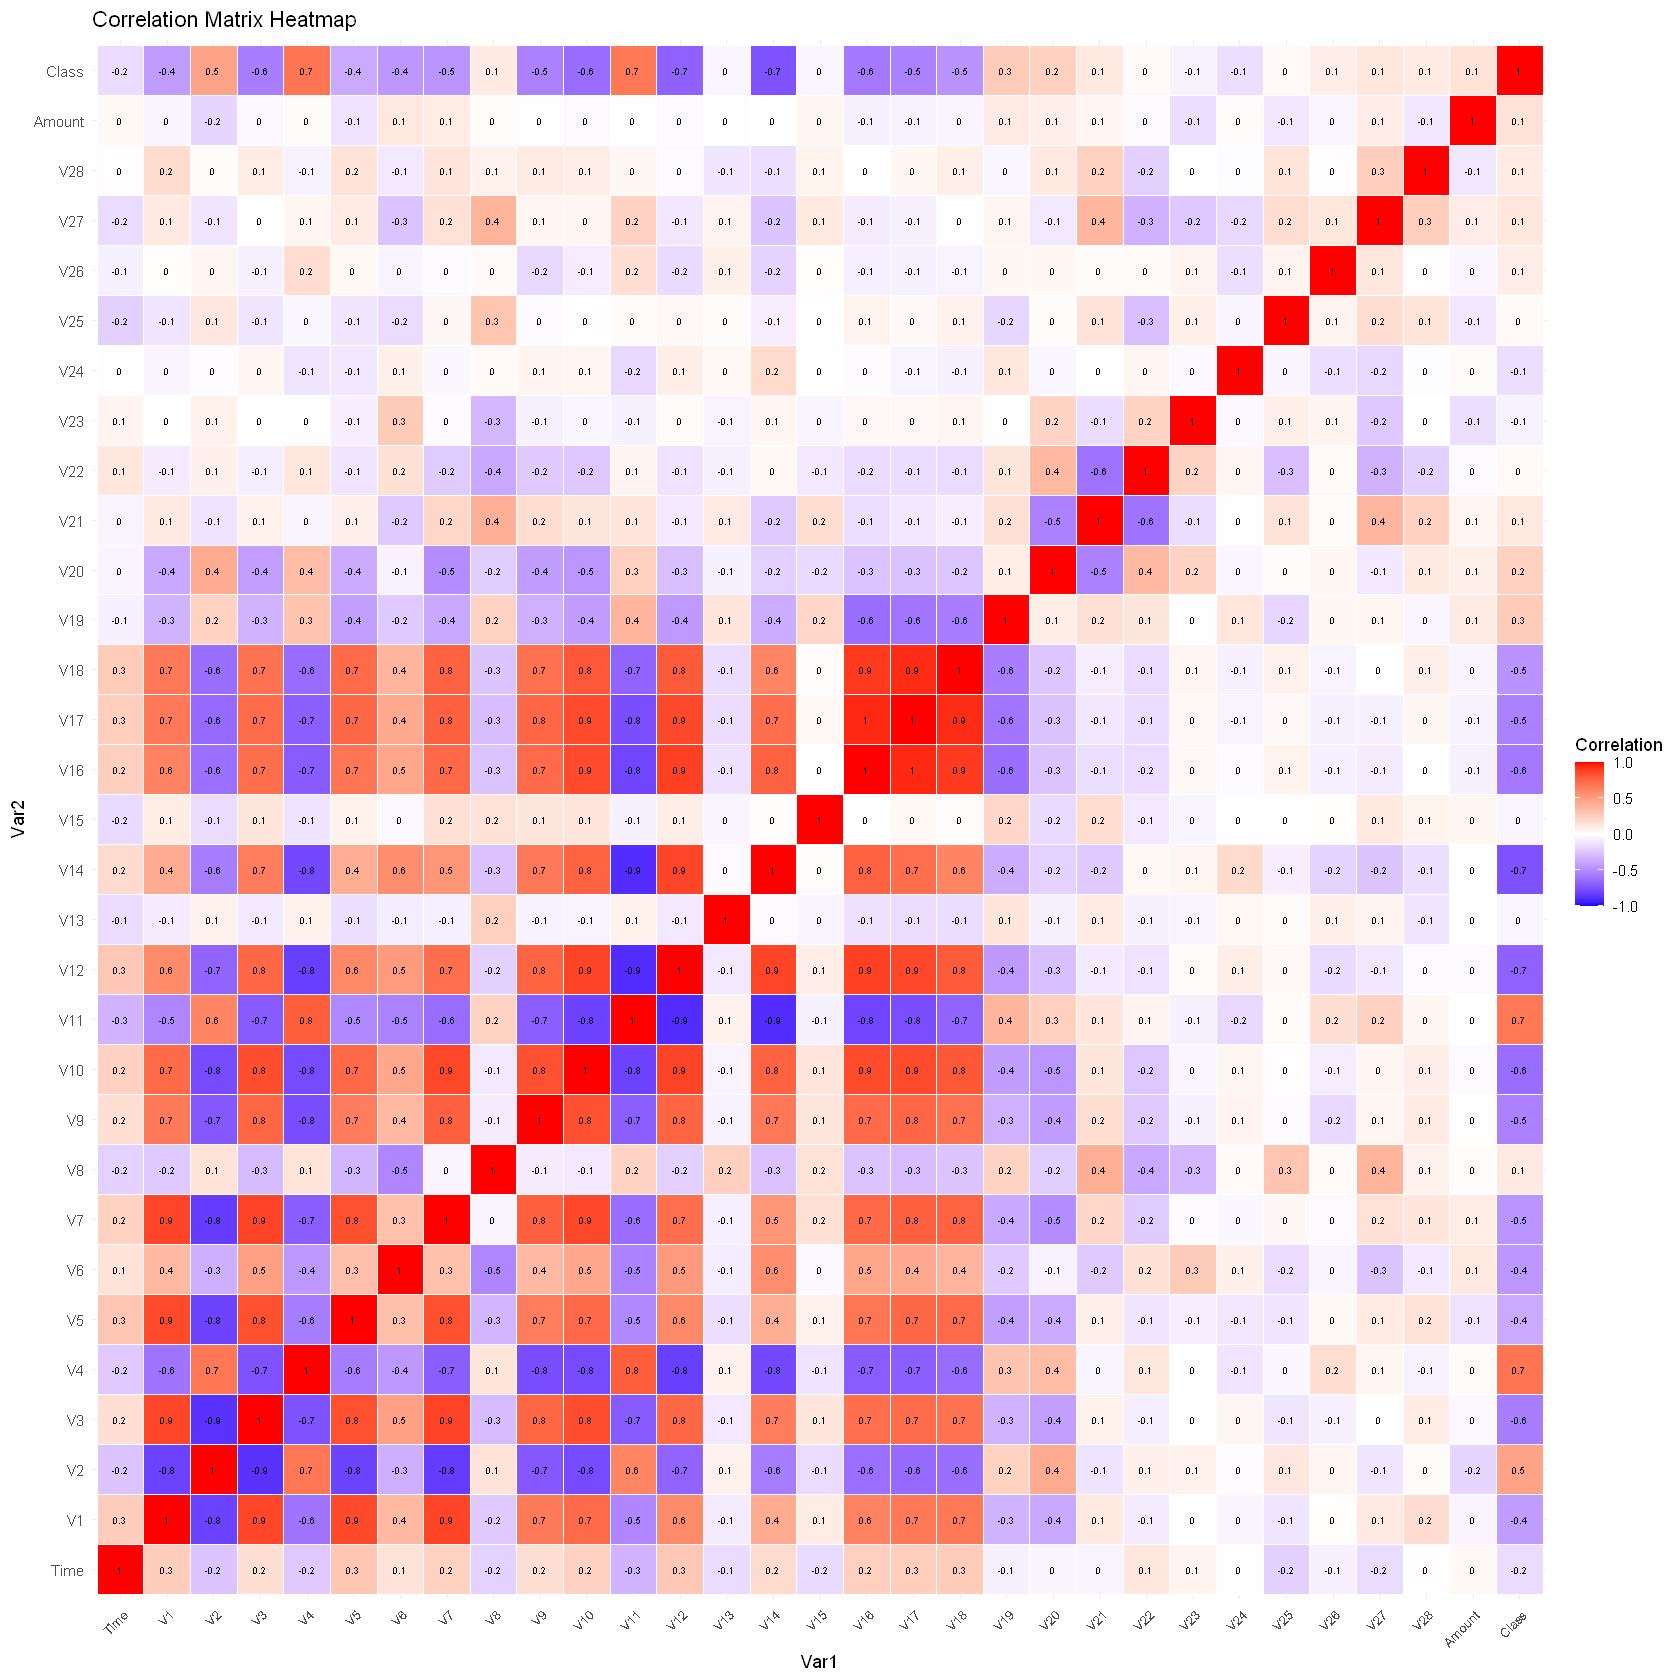

In [160]:
# Load necessary libraries
library(ggplot2)
library(reshape2)

# Compute the correlation matrix
correlation_matrix <- cor(down_fraud_data_1)

# Convert the correlation matrix to a data frame
correlation_df <- as.data.frame(as.table(correlation_matrix))

# Rename the columns
colnames(correlation_df) <- c("Var1", "Var2", "value")

# Create heatmap with annotations rounded to 1 decimal place and font size adjusted
heatmap_with_numbers <- ggplot(correlation_df, aes(Var1, Var2, fill = value, label = round(value, 1))) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name = "Correlation") +
  geom_text(color = "black", size = 2) +  # Adjust font size
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1)) +
  labs(title = "Correlation Matrix Heatmap")

# Print the heatmap with annotations rounded to 1 decimal place and adjusted font size
print(heatmap_with_numbers)

In [163]:
model_9_lm <- lm(Class ~ . - V2 - V3 - V4 -V7 - V8 - V9 - V10 -V11 - V12 - V14 -V16 - V17 - V18 - V25 - V26, data=down_fraud_data_1)
summary(model_9_lm)


Call:
lm(formula = Class ~ . - V2 - V3 - V4 - V7 - V8 - V9 - V10 - 
    V11 - V12 - V14 - V16 - V17 - V18 - V25 - V26, data = down_fraud_data_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95792 -0.32923 -0.06919  0.32665  0.89987 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.381e+00  3.059e-02  45.158  < 2e-16 ***
Time        -9.695e-07  2.915e-07  -3.325 0.000918 ***
V1          -7.112e-02  9.812e-03  -7.248 8.88e-13 ***
V5           3.166e-02  9.371e-03   3.378 0.000760 ***
V6          -1.249e-01  1.224e-02 -10.203  < 2e-16 ***
V13         -4.185e-02  1.227e-02  -3.411 0.000675 ***
V15         -3.868e-02  1.290e-02  -2.999 0.002782 ** 
V19          3.290e-02  1.002e-02   3.282 0.001067 ** 
V20          5.118e-02  1.450e-02   3.529 0.000438 ***
V21          3.894e-02  7.580e-03   5.138 3.39e-07 ***
V22          5.727e-02  1.270e-02   4.508 7.38e-06 ***
V23          8.306e-03  8.065e-03   1.030 0.303344    
V24         -6.851e-

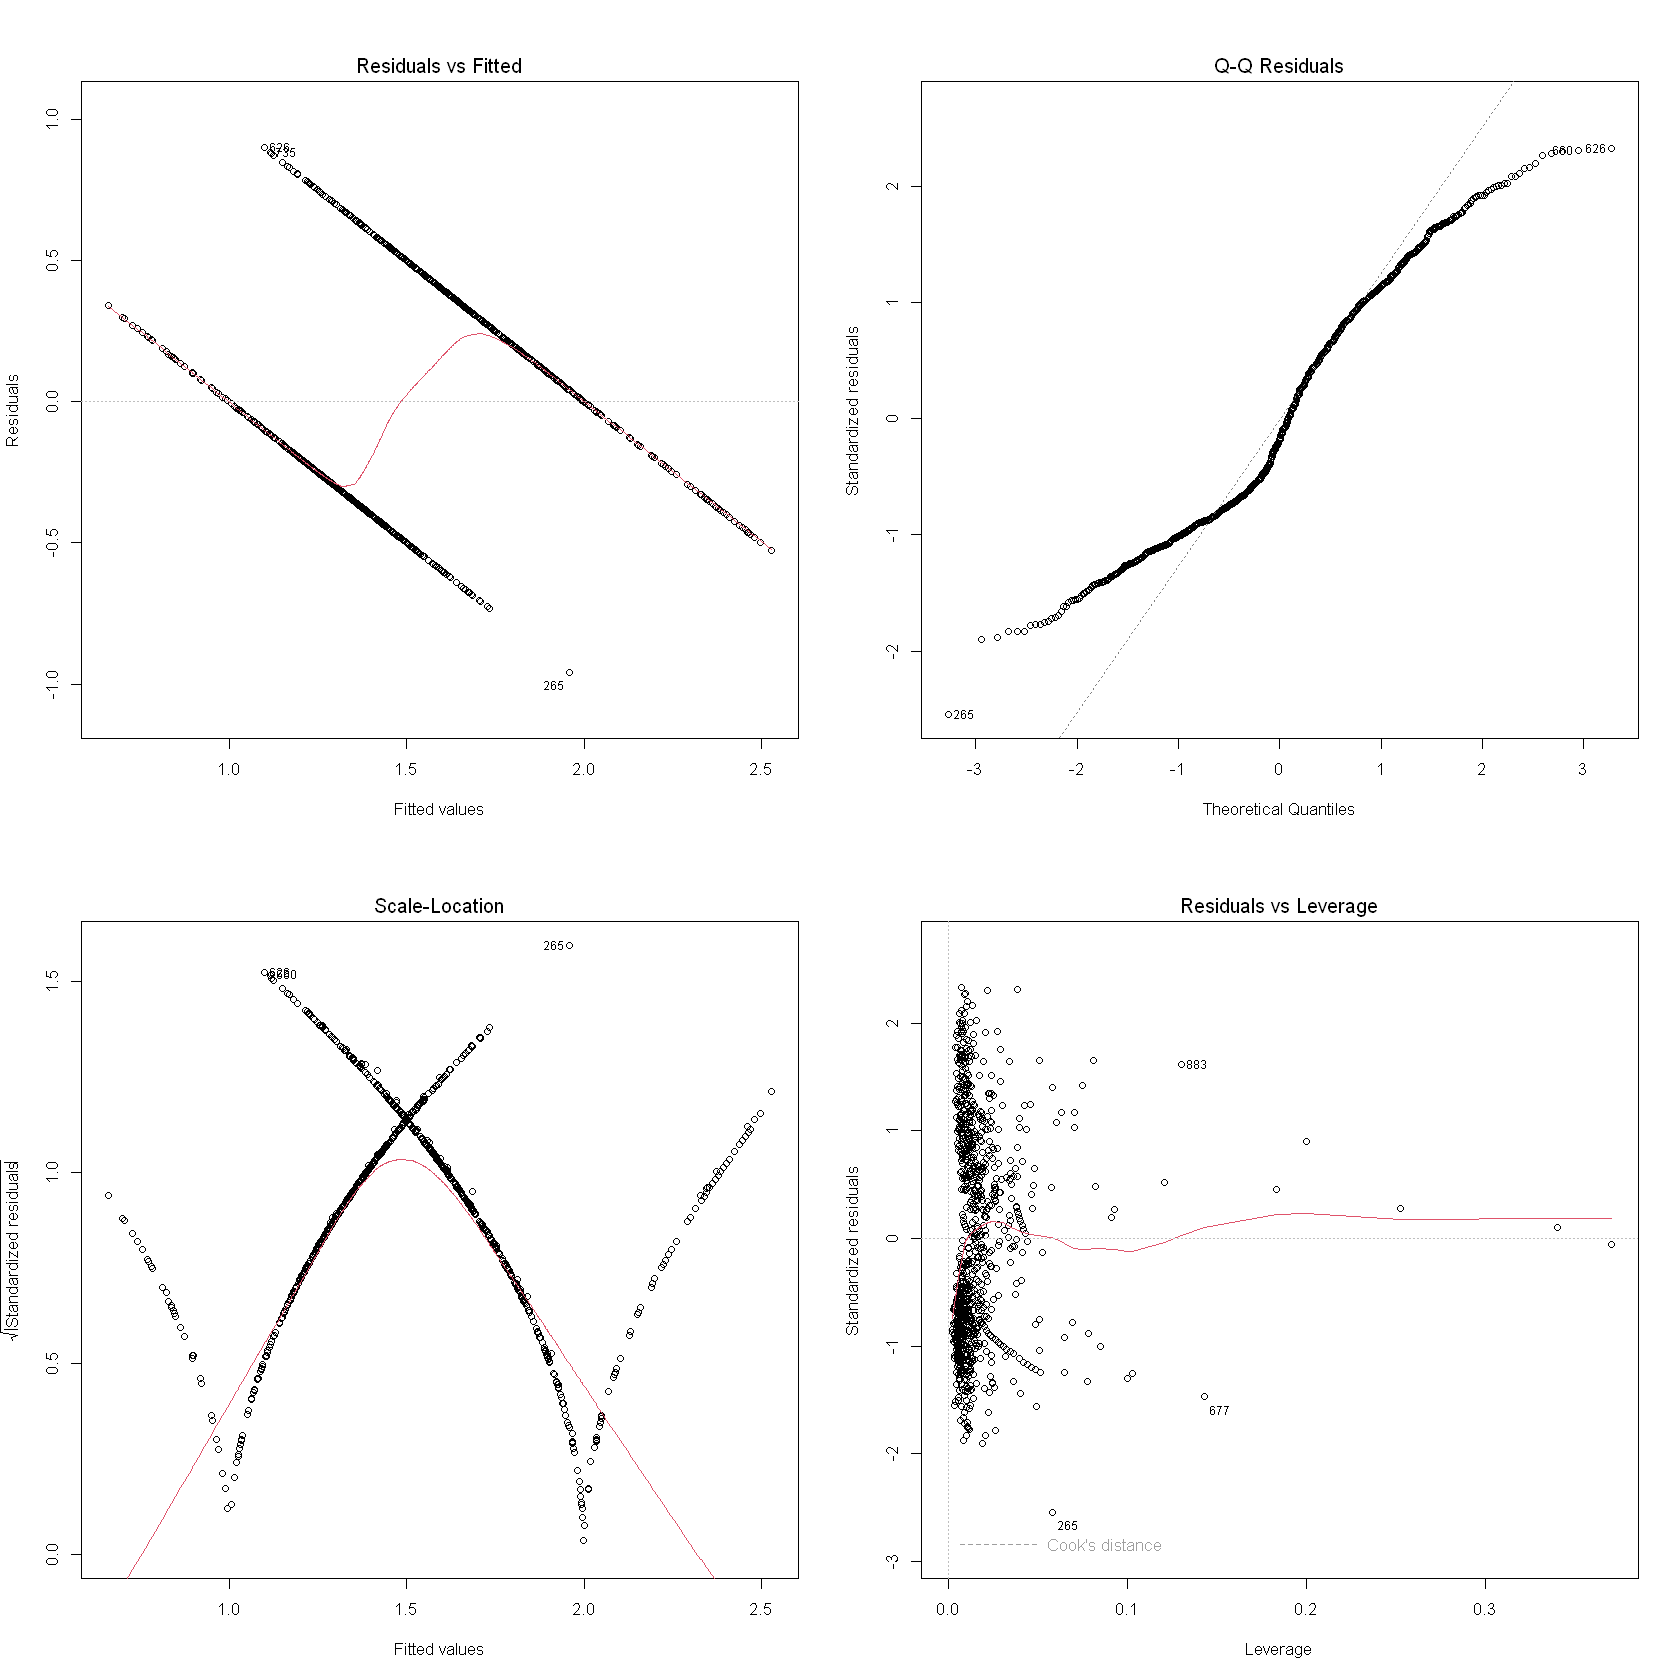

In [164]:
par(mfrow=c(2,2))
plot(model_9_lm)

In [165]:
og_model_9_lm <- lm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data_1)
summary(og_model_9_lm)


Call:
lm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data = down_fraud_data_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62565 -0.21538 -0.07504  0.18963  0.87143 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.214e+00  2.632e-02  46.142  < 2e-16 ***
Time        -4.587e-07  2.491e-07  -1.841 0.065874 .  
V1          -5.119e-02  9.880e-03  -5.181 2.72e-07 ***
V4           7.646e-02  9.655e-03   7.920 6.86e-15 ***
V5           1.487e-02  9.943e-03   1.496 0.135095    
V6          -3.411e-02  1.151e-02  -2.964 0.003113 ** 
V7           2.481e-02  1.060e-02   2.340 0.019473 *  
V8          -1.902e-02  5.097e-03  -3.732 0.000201 ***
V9           2.198e-02  9.607e-03   2.288 0.022355 *  
V10         -2.820e-02  9.279e-03  -3.039 0.002444 ** 
V11         -1.222e-02  1.027e-02  -1.190 0.234503    
V12          1.438e-02  8.155e-03   1.763 0.078226 .  
V13         -1.588e-02  9.685e-03  -1.640 0.101380    
V14         -5.862e-

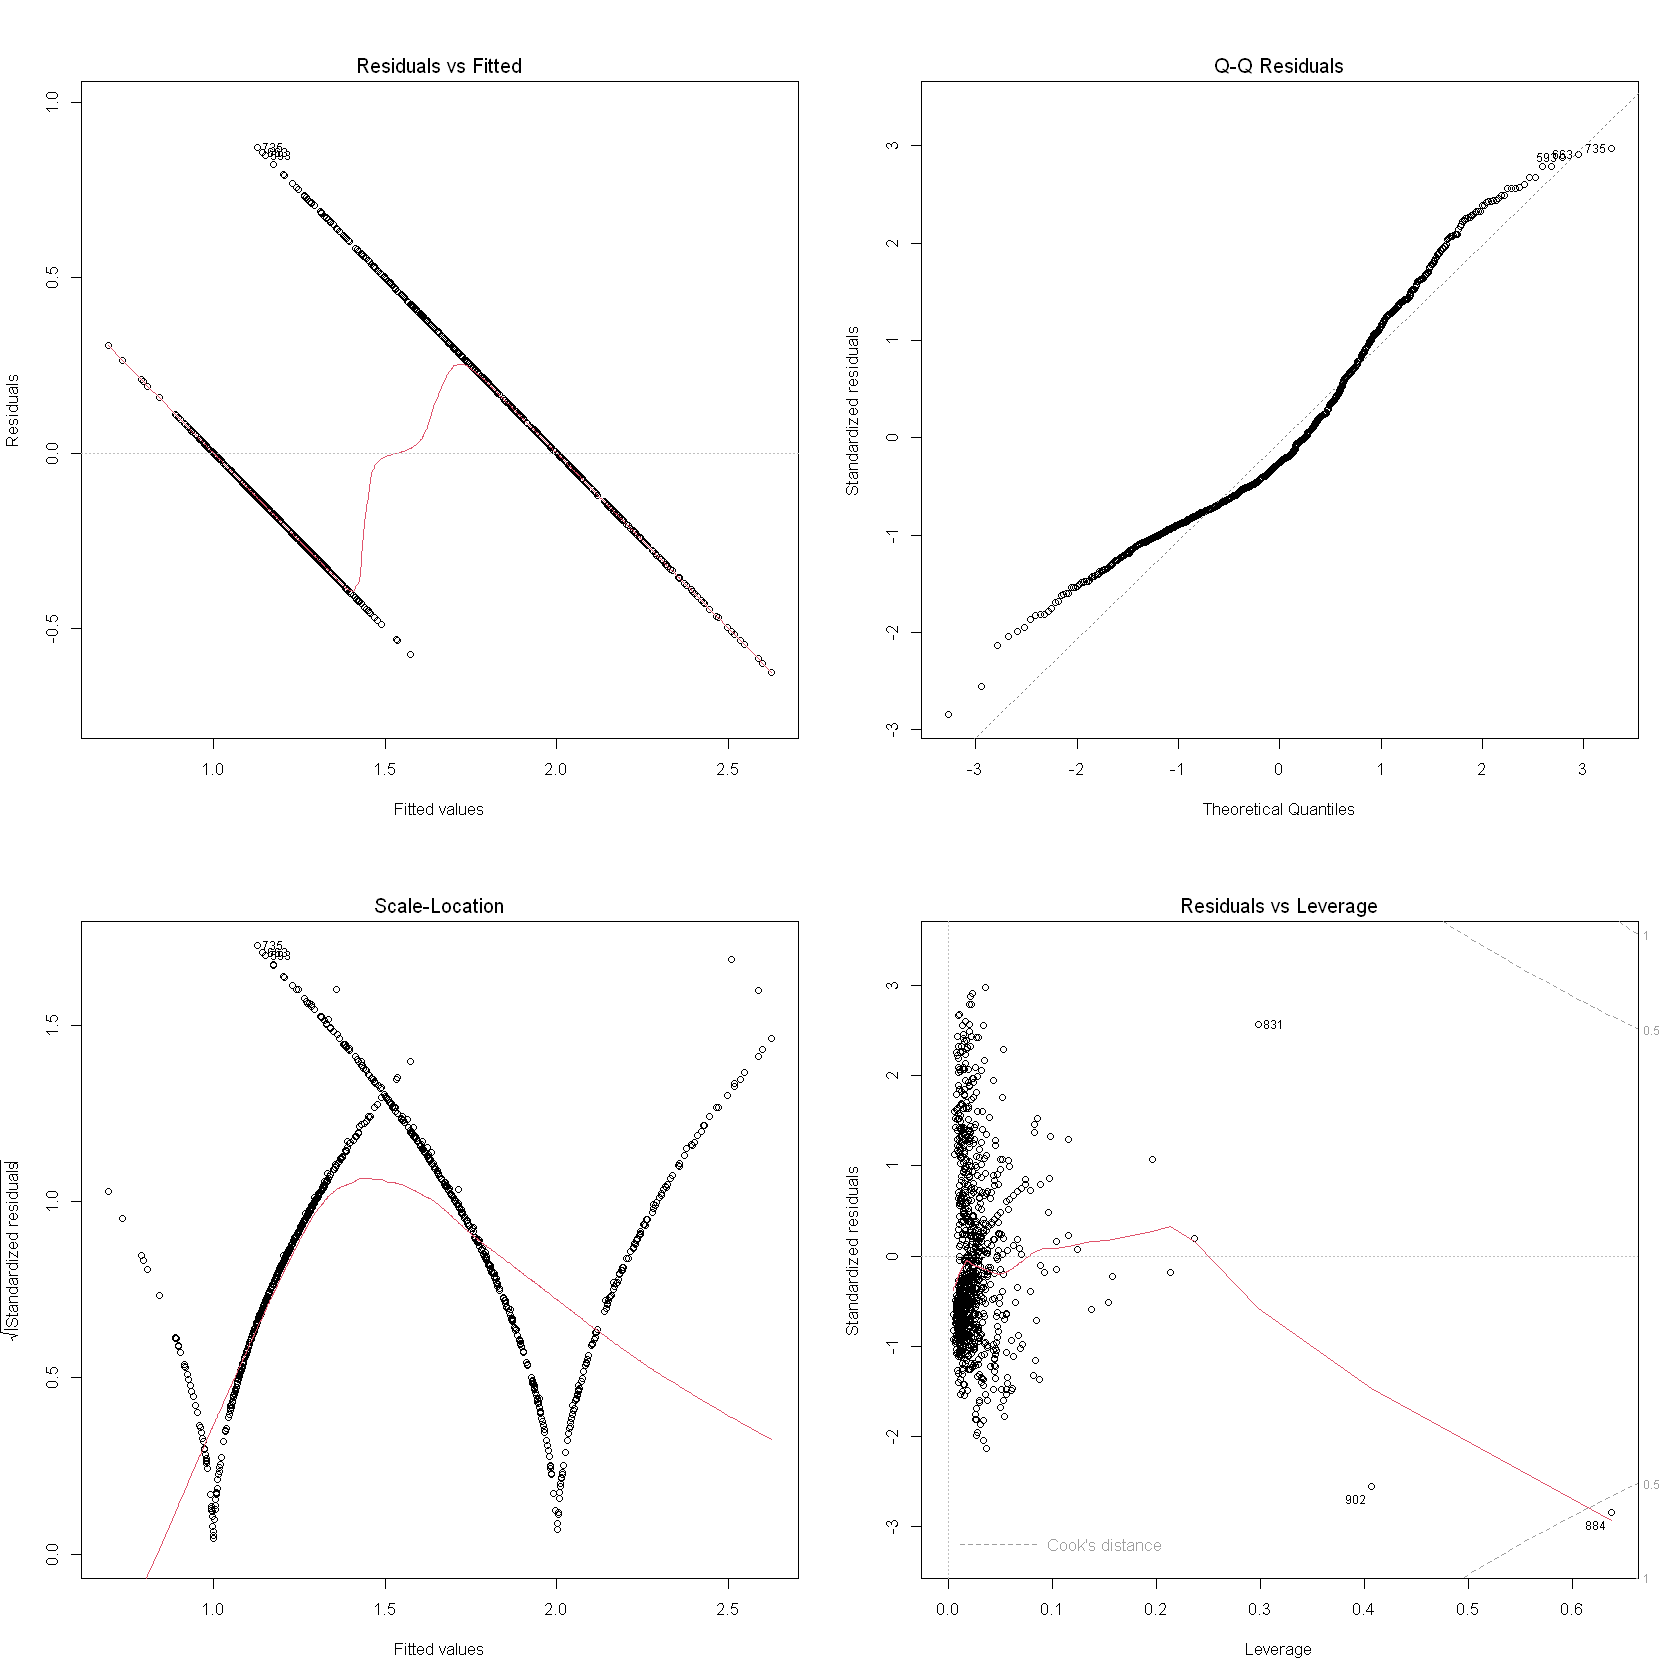

In [167]:
par(mfrow=c(2,2))
plot(og_model_9_lm)